
# <center>Clustering</center>

<center>Anshuman Guha</center>  

<a id="top"></a>
## Assignment research question
Having Classification model in the project 2 exercise on the 2014 school data that provided a good generalization model supporting anecdotal claims that district with lower socio-economic status has schools which tend to have higher student to teacher ratio than schools in a well off districts. In this project We will use clustering on data at a district level as a preprocessing step that will help discretize similar features such as different metrics for schools academic achievement and used the resulting clusters is used in as dummy variables to help improve classificaton model accuracy. The purpose of this project is to improve classification model by :

- using clustering for feature extraction on grouped  features based on similarity such as features grouped by demography and academic achievement and come out with discretized features that help improve the classifcation model
- Using different clustering techniques and compare their validity metrics as well as the overall performance of the classification model to select the appropriate clustering
 

** Clustering for feature extraction ** <br /><em>(Click hyperlinks to skip to answers)</em>
<p>** Business Understanding ** <a href="#dataPreparation">(10 points)</a></p>

* <a href="#dataPreparation">[10 points]</a> <em>  [10 points] Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs? </em>

** Data Understanding (20 points total) **
* <a href="#Define And Prepare">[10 points]</a> <em> Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?</em>

* <a href="#Visualize the any important attributes">[10 points]</a> <em>Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.</em> 

** Modeling and Evaluation (50 points total) **

Different tasks will require different evaluation methods. Be as thorough as possible when analyzing the data you have chosen and use visualizations of the results to explain the performance and expected outcomes whenever possible. Guide the reader through your analysis with plenty of discussion of the results. Each option is broken down by:
* <a href="#Train and adjust parameters">[10 points]</a> <em> ** Train and adjust parameters :** Perform cluster analysis using several clustering methods (adjust parameters).</em>
* <a href="#Evaluate and Compare">[10 points]</a> <em> **Evaluate and Compare :** Use internal and/or external validation measures to describe and compare the clusterings and the clusters— how did you determine a suitable number of clusters for each method?</em>
* <a href="#Visualize Results">[10 points]</a> <em>** Visualize Results:** Use tables/visualization to discuss the found results. Explain each visualization in detail.</em>
* <a href="#analyzeTheResults">[20 points]</a> <em>** Summarize the Ramifications:** Describe your results. What findings are the most interesting and why? </em>

<p>** Deployment ** <a href="#deployment">(10 points)</a></p>
* <em>How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?</em>

<p>** Exceptional Work ** <a href="#ExceptionalWork">(10 points)</a></p>
* <a href="#ExceptionalWork">[10 points]</a> <em>You have free reign to provide additional analyses.</em>





### Import relevant libraries

In [59]:
import os,sys
import xlrd
import math
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn import decomposition
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn import metrics as mt
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise
from matplotlib import pyplot as pyplot
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import time

### Create list of files provided by OEQA

In [2]:
directoryPath = 'oeqaProfiles'
directory = os.listdir(directoryPath)
oeqaFilesProvided = []
for file in directory:
        oeqaFilesProvided.append(file)
print ('Number of files: '+ str(len(oeqaFilesProvided)))
print (oeqaFilesProvided)

Number of files: 18
['Profiles Database 1997(Excel 5).xls', 'Profiles Database 1998.xls', 'Profiles Database 1999.xls', 'Profiles Database 2000.xls', 'Profiles Database 2001.xls', 'Profiles Database 2002.xls', 'Profiles Database 2003.xls', 'Profiles Database 2004.xls', 'Profiles Database 2005.xls', 'Profiles Database 2006.xls', 'Profiles Database 2007.xls', 'Profiles Database 2008.xls', 'Profiles Database 2009.xls', 'Profiles Database 2010.xls', 'Profiles Database 2011.xlsx', 'Profiles Database 2012.xlsx', 'Profiles Database 2013.xlsx', 'Profiles Database 2014.xlsx']


### Create list of years of data

In [3]:
profileYears = []
yearsStart = int(1997)

while yearsStart < 2015:
    profileYears.append(yearsStart)
    yearsStart += 1
print (profileYears)

[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]


### Import files to dictionary of dataframes

In [4]:
def importExcelFiles(dictionary,years,files,directory,sheetKeyword):
    count = 0
    for year in years:
        yearData = str(year)
        fileName = files[count]
        dataFrameName = sheetKeyword+yearData
        pathToFile = os.path.join(directory,fileName)
        sheetNames = pd.ExcelFile(pathToFile).sheet_names
        for sheetName in sheetNames:
            if sheetKeyword in sheetName:
                #Use print to provide user feedback
                print (fileName+" is now '"+dataFrameName+"'")
                try: 
                    dictionary[dataFrameName]=pd.read_excel(pathToFile,sheetname=sheetName,header=None)
                    ## Having an error with 2005
                except:
                    pass
        count = count+1
        
dataFrames = {}
importExcelFiles(dataFrames,profileYears,oeqaFilesProvided,"oeqaProfiles","School")

Profiles Database 1997(Excel 5).xls is now 'School1997'
Profiles Database 1998.xls is now 'School1998'
Profiles Database 1999.xls is now 'School1999'
Profiles Database 2000.xls is now 'School2000'
Profiles Database 2001.xls is now 'School2001'
Profiles Database 2002.xls is now 'School2002'
Profiles Database 2003.xls is now 'School2003'
Profiles Database 2004.xls is now 'School2004'
Profiles Database 2005.xls is now 'School2005'
Profiles Database 2006.xls is now 'School2006'
Profiles Database 2007.xls is now 'School2007'
Profiles Database 2008.xls is now 'School2008'
Profiles Database 2009.xls is now 'School2009'
Profiles Database 2010.xls is now 'School2010'
Profiles Database 2011.xlsx is now 'School2011'
Profiles Database 2012.xlsx is now 'School2012'
Profiles Database 2013.xlsx is now 'School2013'
Profiles Database 2014.xlsx is now 'School2014'


### View keys for dataframes

In [5]:
dfKeys = list(dataFrames.keys())
print (dfKeys)

['School1997', 'School2011', 'School1999', 'School1998', 'School2000', 'School2001', 'School2002', 'School2003', 'School2004', 'School2010', 'School2006', 'School2007', 'School2008', 'School2009', 'School2013', 'School2014', 'School2012']


### Examine raw dimensions of 2014 data

In [6]:
school2014raw = dataFrames["School2014"]
school2014raw.shape

(1777, 207)

### View head of raw 2014

In [7]:
school2014raw.head(8)

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
0,Rec No:,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,01C019105,01,C019,105,1,PRIMARY,ADAIR,PEAVINE,PEAVINE ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA
2,NaN,PRIMARY State Average:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43,80,15,50,25,77,37,81,25,87
3,NaN,School Header,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"EOI - U.S. History (All Students, FAY)",NaN,"EOI - Biology I (All Students, FAY)",NaN,"EOI - Algebra II (All Students, FAY)",NaN,"EOI - Geometry (All Students, FAY)",NaN,"EOI - English III (All Students, FAY)",NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Performance (%),NaN,Performance (%),NaN,Performance (%),NaN,Performance (%),NaN,Performance (%),NaN
6,Rec No.,SDE,CoNo,DistNo,SitNo,Type,Template,County,District,Site,...,Advanced,>=Satisfactory,Advanced,>=Satisfactory,Advanced,>=Satisfactory,Advanced,>=Satisfactory,Advanced,>=Satisfactory
7,1,01C019105,01,C019,105,1,PRIMARY,ADAIR,PEAVINE,PEAVINE ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA


### View tail of raw 2014 data

In [8]:
school2014raw.tail(8)

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
1769,1763,77I002715,77,I002,715,2,SECONDARY,WOODWARD,MOORELAND,SENIOR HIGH SCHOOL,...,44,96,10,49,23,81,45,90,20,90
1770,1764,77I003105,77,I003,105,1,PRIMARY,WOODWARD,SHARON-MUTUAL,SHARON-MUTUAL ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA
1771,1765,77I003705,77,I003,705,2,SECONDARY,WOODWARD,SHARON-MUTUAL,SHARON-MUTUAL HIGH SCHOOL,...,10,85,10,45,0,55,20,70,17,75
1772,1766,77I005105,77,I005,105,1,PRIMARY,WOODWARD,FORT SUPPLY,FORT SUPPLY ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA
1773,1767,77I005705,77,I005,705,2,SECONDARY,WOODWARD,FORT SUPPLY,FORT SUPPLY HIGH SCHOOL,...,**,**,**,**,33,83,29,71,38,100
1774,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1775,NaN,NaN,NaN,NaN,NaN,1,PRIMARY,NaN,NaN,NaN,...,43,80,15,50,25,77,37,81,25,87
1776,NaN,NaN,State Average:,NaN,NaN,2,SECONDARY,NaN,NaN,NaN,...,43,80,15,50,25,77,37,81,25,87


### Select school records

In [9]:
def selectSchoolRecords(dataFrame,startRow,endRow):
    schoolRecords = dataFrame[startRow:endRow]
    schoolRecords = schoolRecords.reset_index(drop=True)
    return schoolRecords
    
selectedRecords = selectSchoolRecords(school2014raw,7,1774)
selectedRecords.head()

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
0,1,01C019105,01,C019,105,1,PRIMARY,ADAIR,PEAVINE,PEAVINE ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA
1,2,01C022105,01,C022,105,1,PRIMARY,ADAIR,MARYETTA,MARYETTA ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA
2,3,01C024105,01,C024,105,1,PRIMARY,ADAIR,ROCKY MOUNTAIN,ROCKY MOUNTAIN ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA
3,4,01C028105,01,C028,105,1,PRIMARY,ADAIR,ZION,ZION ELEMENTARY,...,DNA,DNA,0,75,DNA,DNA,DNA,DNA,DNA,DNA
4,5,01C029105,01,C029,105,1,PRIMARY,ADAIR,DAHLONEGAH,DAHLONEGAH ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA


### List of attributes to extract
After reviewing Excel file

In [10]:
attributes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76]
len(attributes)

60

### Extract attributes for analysis

In [158]:
school2014 = selectedRecords[attributes]
school2014.shape

(1767, 60)

### List of new column names
After reviewing Excel file

In [159]:
attributeNames = ["recordNumber","schoolID","countyNumber","districtID","siteID","schoolType","template","county","district",
"school","lowGrade","highGrade","gradeSpan","address1","address2","telephone","release","whiteOther_School","black_School",
"asian_School","hispanic_School","nativeAmerican_School","whiteOther_District","black_District","asian_District",
"hispanic_District","nativeAmerican_District","averagePropertyValuePerADM_District","freeReducedLunch_School",
"freeReducedLunch_District","population_District","averageHouseholdIncome_District","unemploymentRate_District",
"povertyRate_District","singleParentFamilies_District","educationalAttainment_collegeAndAbove_District","educationalAttainment_highSchoolNoCollegeDegree_District",
"educationalAttainment_lessThan12thGrade_District","fallEnrollment_School","fallEnrollment_District","nonSpecialEdTeachersFTE_School",
"nonSpecialEdTeachersFTE_District","averageSalaryTeachers_School","averageSalaryTeachers_District","advancedDegreeTeachers_School",
"advancedDegreeTeachers_District","yearsExperienceTeachers_School","yearsExperienceTeachers_District","studentsInSpecialEd_School",
"studentsInSpecialEd_District","studentsInELL_School","studentsInELL_District","specialEdTeachersFTE_School","specialEdTeachersFTE_District",
"counselorsFTE_School","counselorsFTE_District","otherProfessionalStaffFTE_School","otherProfessionalStaffFTE_District",
"administratorsFTE_School","administratorsFTE_District"]
len(attributeNames)

60

### Rename columns

In [160]:
school2014.columns = attributeNames
school2014.columns

Index([u'recordNumber', u'schoolID', u'countyNumber', u'districtID', u'siteID',
       u'schoolType', u'template', u'county', u'district', u'school',
       u'lowGrade', u'highGrade', u'gradeSpan', u'address1', u'address2',
       u'telephone', u'release', u'whiteOther_School', u'black_School',
       u'asian_School', u'hispanic_School', u'nativeAmerican_School',
       u'whiteOther_District', u'black_District', u'asian_District',
       u'hispanic_District', u'nativeAmerican_District',
       u'averagePropertyValuePerADM_District', u'freeReducedLunch_School',
       u'freeReducedLunch_District', u'population_District',
       u'averageHouseholdIncome_District', u'unemploymentRate_District',
       u'povertyRate_District', u'singleParentFamilies_District',
       u'educationalAttainment_collegeAndAbove_District',
       u'educationalAttainment_highSchoolNoCollegeDegree_District',
       u'educationalAttainment_lessThan12thGrade_District',
       u'fallEnrollment_School', u'fallEnrollme

### Check attribute data types

In [161]:
school2014.dtypes

recordNumber                                                object
schoolID                                                    object
countyNumber                                                object
districtID                                                  object
siteID                                                      object
schoolType                                                  object
template                                                    object
county                                                      object
district                                                    object
school                                                      object
lowGrade                                                    object
highGrade                                                   object
gradeSpan                                                   object
address1                                                    object
address2                                                    ob

In [162]:
import warnings
warnings.filterwarnings('ignore')

school2014["studentsInSpecialEd_School"]=school2014["studentsInSpecialEd_School"].replace(to_replace='DNA', value=np.nan,regex=True)
school2014["studentsInSpecialEd_District"]=school2014["studentsInSpecialEd_District"].replace(to_replace='DNA', value=np.nan,regex=True)

### Set attribute data types
After reviewing Excel file

In [163]:
school2014["recordNumber"] = school2014["recordNumber"].astype('int') # recordNumber
school2014["schoolID"] = school2014["schoolID"].astype('str') # schoolID 1
school2014["countyNumber"] = school2014["countyNumber"].astype('category') # countyNumber
school2014["districtID"] = school2014["districtID"].astype('category') # districtID
school2014["siteID"] = school2014["siteID"].astype('category') # siteID
school2014["schoolType"] = school2014["schoolType"].astype('category') # schoolType
school2014["template"] = school2014["template"].astype('category') # template
school2014["county"] = school2014["county"].astype('category') # county
school2014["district"] = school2014["district"].astype('category') # district 2
school2014["school"] = school2014["school"].astype('str') # school 3
school2014["lowGrade"] = school2014["lowGrade"].astype('category') # lowGrade
school2014["highGrade"] = school2014["highGrade"].astype('category') # highGrade
school2014["gradeSpan"] = school2014["gradeSpan"].astype('category') # gradeSpan 4
school2014["address1"] = school2014["address1"].astype('str') # address1
school2014["address2"] = school2014["address2"].astype('str') # address2
school2014["telephone"] = school2014["telephone"].astype('str') # telephone
school2014["release"] = school2014["release"].astype('category') # release
school2014["whiteOther_School"] = school2014["whiteOther_School"].astype('float') # whiteOther_School ratio 5
school2014["black_School"] = school2014["black_School"].astype('float') # black_School ratio 6
school2014["asian_School"] = school2014["asian_School"].astype('float') # asian_School ratio 7
school2014["hispanic_School"] = school2014["hispanic_School"].astype('float') # hispanic_School ratio 8
school2014["nativeAmerican_School"] = school2014["nativeAmerican_School"].astype('float') # nativeAmerican_School ratio 9
school2014["whiteOther_District"] = school2014["whiteOther_District"].astype('float') # whiteOther_District ratio 10 
school2014["black_District"] = school2014["black_District"].astype('float') # black_District ratio 11
school2014["asian_District"] = school2014["asian_District"].astype('float') # asian_District ratio 12
school2014["hispanic_District"] = school2014["hispanic_District"].astype('float') # hispanic_District ratio 13 
school2014["nativeAmerican_District"] = school2014["nativeAmerican_District"].astype('float') # nativeAmerican_District ratio 14
school2014["averagePropertyValuePerADM_District"] = school2014["averagePropertyValuePerADM_District"].astype('float') # averagePropertyValuePerADM_District 15
school2014["freeReducedLunch_School"] = school2014["freeReducedLunch_School"].astype('float') # freeReducedLunch_School 16
school2014["freeReducedLunch_District"] = school2014["freeReducedLunch_District"].astype('float') # freeReducedLunch_District 17
school2014["population_District"] = school2014["population_District"].astype('int') # population_District 18
school2014["averageHouseholdIncome_District"] = school2014["averageHouseholdIncome_District"].astype('float') # averageHouseholdIncome_District 19 
school2014["unemploymentRate_District"] = school2014["unemploymentRate_District"].astype('float') # unemploymentRate_District 20
school2014["povertyRate_District"] = school2014["povertyRate_District"].astype('float') # povertyRate_District 21
school2014["singleParentFamilies_District"] = school2014["singleParentFamilies_District"].astype('float') # singleParentFamilies_District 22
school2014["educationalAttainment_collegeAndAbove_District"] = school2014["educationalAttainment_collegeAndAbove_District"].astype('float') # educationalAttainment_collegeAndAbove_District 23
school2014["educationalAttainment_highSchoolNoCollegeDegree_District"] = school2014["educationalAttainment_highSchoolNoCollegeDegree_District"].astype('float') # educationalAttainment_highSchoolNoCollegeDegree_District 24
school2014["educationalAttainment_lessThan12thGrade_District"] = school2014["educationalAttainment_lessThan12thGrade_District"].astype('float') # educationalAttainment_lessThan12thGrade_District 25
school2014["fallEnrollment_School"] = school2014["fallEnrollment_School"].astype('int') # fallEnrollment_School 26
school2014["fallEnrollment_District"] = school2014["fallEnrollment_District"].astype('int') # fallEnrollment_District 27
school2014["nonSpecialEdTeachersFTE_School"] = school2014["nonSpecialEdTeachersFTE_School"].astype('float') # nonSpecialEdTeachersFTE_School 28
school2014["nonSpecialEdTeachersFTE_District"] = school2014["nonSpecialEdTeachersFTE_District"].astype('float') # nonSpecialEdTeachersFTE_District 29
school2014["averageSalaryTeachers_School"] = school2014["averageSalaryTeachers_School"].astype('float') # averageSalaryTeachers_School 30 
school2014["averageSalaryTeachers_District"] = school2014["averageSalaryTeachers_District"].astype('float') # averageSalaryTeachers_District 31
school2014["advancedDegreeTeachers_School"] = school2014["advancedDegreeTeachers_School"].astype('float') # advancedDegreeTeachers_School 32
school2014["advancedDegreeTeachers_District"] = school2014["advancedDegreeTeachers_District"].astype('float') # advancedDegreeTeachers_District 33
school2014["yearsExperienceTeachers_School"] = school2014["yearsExperienceTeachers_School"].astype('float') # yearsExperienceTeachers_School 34
school2014["yearsExperienceTeachers_District"] = school2014["yearsExperienceTeachers_District"].astype('float') # yearsExperienceTeachers_District 35
school2014["studentsInSpecialEd_School"] = school2014["studentsInSpecialEd_School"].astype('float') # studentsInSpecialEd_School 36
school2014["studentsInSpecialEd_District"] = school2014["studentsInSpecialEd_District"].astype('float') # studentsInSpecialEd_District 37
school2014["studentsInELL_School"] = school2014["studentsInELL_School"].astype('float') # studentsInELL_School 38
school2014["studentsInELL_District"] = school2014["studentsInELL_District"].astype('float') # studentsInELL_District 38
school2014["specialEdTeachersFTE_School"] = school2014["specialEdTeachersFTE_School"].astype('float') # specialEdTeachersFTE_School 40
school2014["specialEdTeachersFTE_District"] = school2014["specialEdTeachersFTE_District"].astype('float') # specialEdTeachersFTE_District 41 
school2014["counselorsFTE_School"] = school2014["counselorsFTE_School"].astype('float') # counselorsFTE_School 42 
school2014["counselorsFTE_District"] = school2014["counselorsFTE_District"].astype('float') # counselorsFTE_District 43
school2014["otherProfessionalStaffFTE_School"] = school2014["otherProfessionalStaffFTE_School"].astype('float') # otherProfessionalStaffFTE_School 44
school2014["otherProfessionalStaffFTE_District"] = school2014["otherProfessionalStaffFTE_District"].astype('float') # otherProfessionalStaffFTE_District 45 
school2014["administratorsFTE_School"] = school2014["administratorsFTE_School"].astype('float') # administratorsFTE_School 46
school2014["administratorsFTE__District"] = school2014["administratorsFTE_District"].astype('float') # administratorsFTE__District 47

### Recheck attribute data types

In [164]:
school2014.dtypes

recordNumber                                                   int32
schoolID                                                      object
countyNumber                                                category
districtID                                                  category
siteID                                                      category
schoolType                                                  category
template                                                    category
county                                                      category
district                                                    category
school                                                        object
lowGrade                                                    category
highGrade                                                   category
gradeSpan                                                   category
address1                                                      object
address2                          

<p><a href="#top">Return to top</a></p>
<a id="Define And Prepare"></a>

# Define And Prepare
### Preliminary variable selection
The 2014 data contains 207 attributes representing 1,767 records. For this assignment we will examine the following 60 of those attributes. The other attributes are measures related to standardized test accross different grade levels and are not relevant to our research question.
<ul>
<li>
<strong>recordNumber</strong> <em>(integer)</em>: An incrementing count of each school record in the 2014 data.
</li>
<li>
<strong>schoolID</strong> <em>(string)</em>: A unique identifier for a school.
</li>
<li>
<strong>countyNumber</strong> <em>(int)</em>: An integer representing the 77 counties in Oklahoma.
</li>
<li>
<strong>districtID</strong> <em>(category)</em>: A string identifier for a district.
</li>
<li>
<strong>siteID</strong> <em>(category)</em>: An identifier for a school. 
</li>
<li>
<strong>schoolType</strong> <em>(category)</em>: A categorical integer value indicated the template of the school.
</li>
<li>
<strong>template</strong> <em>(category)</em>: A categorical value indicated the school type.
</li>
<li>
<strong>county</strong> <em>(category)</em>: A string value indicating the county where the school is located. 
</li>
<li>
<strong>district</strong> <em>(category)</em>: The district associated with a school record.
</li>
<li>
<strong>school</strong> <em>(category)</em>: A school's name.
</li>
<li>
<strong>lowGrade</strong> <em>(category)</em>: The lowest grade level provided at a school.
</li>
<li>
<strong>highGrade</strong> <em>(category)</em>: The highes grade level provided at a school.
</li>
<li>
<strong>gradeSpan</strong> <em>(category)</em>: Grade levels provided at a school.
</li>
<li>
<strong>address1</strong> <em>(string)</em>: A school's mailing address.
</li>
<li>
<strong>address2</strong> <em>(string)</em>: A school's city, state and postal code.
</li>
<li>
<strong>telephone</strong> <em>(string)</em>: A school's telephone.
</li>
<li>
<strong>release</strong> <em>(category)</em>: A binary categorical variable: yes || no.
</li>
<li>
<strong>whiteOther_School</strong> <em>(float/ratio)</em>: The percentage of school's total enrollment whose ethnicity is white or other.
</li>
<li>
<strong>black_School</strong> <em>(float/ratio)</em>: The percentage of a school's total enrollment whose ethnicity is Black.
</li>
<li>
<strong>asian_School</strong> <em>(float/ratio)</em>: The percentage of a school's total enrollment whose ethnicity is Asian.
</li>
<li>
<strong>hispanic_School</strong> <em>(float/ratio)</em>: The percentage of a school's total enrollment whose ethnicity is Hispanic.
</li>
<li>
<strong>nativeAmerican_School</strong> <em>(float/ratio)</em>: The percentage of a school's total enrollment whose ethnicity is Native American.
</li>
<li>
<strong>whiteOther_District</strong> <em>(float/ratio)</em>: The percentage of district's total enrollment whose ethnicity is white or other.
</li>
<li>
<strong>black_District</strong> <em>(float/ratio)</em>: The percentage of a district's total enrollment whose ethnicity is Black.
</li>
<li>
<strong>asian_District</strong> <em>(float/ratio)</em>: The percentage of a district's total enrollment whose ethnicity is Asian.
</li>
<li>
<strong>hispanic_District</strong> <em>(float/ratio)</em>: The percentage of a district's total enrollment whose ethnicity is Hispanic.
</li>
<li>
<strong>nativeAmerican_District</strong> <em>(float/ratio)</em>: The percentage of a district's total enrollment whose ethnicity is Native American.
</li>
<li>
<strong>averagePropertyValuePerADM_District</strong> <em>(float/ratio)</em>: The average property value in a district based on district enrollment.
</li>
<li>
<strong>freeReducedLunch_School</strong> <em>(float/ratio)</em>: Percentage of a school's student enrollment eligible for free or reduced lunches.
</li>
<li>
<strong>freeReducedLunch_District</strong> <em>(float/ratio)</em>: Percentage of a district's student enrollment eligible for free or reduced lunches.
</li>
<li>
<strong>population_District</strong> <em>(integer/ratio)</em>: Population count of those living within district boundaries. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>averageHouseholdIncome_District</strong> <em>(float/ratio)</em>: Average household income of those living within district boundaries. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>unemploymentRate_District</strong> <em>(float/ratio)</em>: Unemployment rate (percentage) of those living with district boundaries. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>povertyRate_District</strong> <em>(float/ratio)</em>: Poverty rate (percentage) of those living with district boundaries. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>singleParentFamilies_District</strong> <em>(float/ratio)</em>: Single-parent families (percentage) of those living with district boundaries. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>educationalAttainment_collegeAndAbove_District</strong> <em>(float/ratio)</em>: Percentage of adults (Age 25+) within district boundaries who have a college degree or taken graduate course work. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>educationalAttainment_highSchoolNoCollegeDegree_District</strong> <em>(float/ratio)</em>: Percentage of adults (Age 25+) within district boundaries who graduated from high school and have no college degree. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>educationalAttainment_lessThan12thGrade_District</strong> <em>(float/ratio)</em>: Percentage of adults (Age 25+) within district boundaries who have less than 12th grade education. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>fallEnrollment_School</strong> <em>(float/ratio)</em>: Number of students enrolled in the school during the fall.
</li>
<li>
<strong>fallEnrollment_District</strong> <em>(float/ratio)</em>: Number of students enrolled in the district during the fall.
</li>
<li>
<strong>nonSpecialEdTeacherFTE_School</strong> <em>(float/ratio)</em>: Number of full-time classroom teachers (FTE) at the school who are not special education teachers.
</li>
<li>
<strong>nonSpecialEdTeacherFTE_District</strong> <em>(float/ratio)</em>: Number of full-time classroom teachers (FTE) at the district who are not special education teachers.
</li>
<li>
<strong>averageSalaryTeachers_School</strong> <em>(float/ratio)</em>: Average salary of teachers at the school.
</li>
<li>
<strong>averageSalaryTeachers_District</strong> <em>(float/ratio)</em>: Average salary of teachers at the district.
</li>
<li>
<strong>advancedDegreeTeachers_School</strong> <em>(float/ratio)</em>: Percentage of teachers at the school who have advanced degrees, i.e., graduate degrees.
</li>
<li>
<strong>advancedDegreeTeachers_District</strong> <em>(float/ratio)</em>: Percentage of teachers at the district who have advanced degrees, i.e., graduate degrees.
</li>
<li>
<strong>yearsExperienceTeachers_School</strong> <em>(float/ratio)</em>: Average years of experience among teachers at the school.
</li>
<li>
<strong>yearsExperienceTeachers_District</strong> <em>(float/ratio)</em>: Average years of experience among teachers at the district.
</li>
<li>
<strong>studentsInSpecialEd_School</strong> <em>(float/ratio)</em>: Percentage of students at the school who are in special education.
</li>
<li>
<strong>studentsInSpecialEd_District</strong> <em>(float/ratio)</em>: Percentage of students at the district who are in special education.
</li>
<li>
<strong>studentsInELL_School</strong> <em>(float/ratio)</em>: Percentage of students at the school who are English language learners.
</li>
<li>
<strong>studentsInELL_District</strong> <em>(float/ratio)</em>: Percentage of students at the district who are English language learners.
</li>
<li>
<strong>specialEdTeachersFTE_School</strong> <em>(float/ratio)</em>: Number of full-time special education teachers at the school.
</li>
<li>
<strong>specialEdTeachersFTE_District</strong> <em>(float/ratio)</em>: Number of full-time special education teachers at the district.
</li>
<li>
<strong>counselorsFTE_School</strong> <em>(float/ratio)</em>: Number of full-time counselors at the school.
</li>
<li>
<strong>counselorsFTE_District</strong> <em>(float/ratio)</em>: Number of full-time counselors at the district.
</li>
<li>
<strong>otherProfessionalStaffFTE_School</strong> <em>(float/ratio)</em>: Number of full-time other professional staff at the school.
</li>
<li>
<strong>otherProfessionalStaffFTE_District</strong> <em>(float/ratio)</em>: Number of full-time other professional staff at the district.
</li>
<li>
<strong>administratorsFTE_School</strong> <em>(float/ratio)</em>: Number of full-time administrators at the school.
</li>
<li>
<strong>administratorsFTE_District</strong> <em>(float/ratio)</em>: Number of full-time administrators at the district.
</li>
</ul>

<em><strong>NOTE:</strong> Because of the amount of munging necessary to combine all files, we only examined the 2014 data and a subset of that data's attributes to demonstrate our competency at the assignment's objectives</em>

### Create data frame of school-level variables

In [165]:
schoolAttributes = ['whiteOther_School','black_School','asian_School','hispanic_School',
                    'nativeAmerican_School','fallEnrollment_School',
                    'nonSpecialEdTeachersFTE_School','averageSalaryTeachers_School',
                    'advancedDegreeTeachers_School','yearsExperienceTeachers_School',
                    'studentsInSpecialEd_School','studentsInELL_School','specialEdTeachersFTE_School',
                    'counselorsFTE_School','otherProfessionalStaffFTE_School','administratorsFTE_School']
schoolData2014 = school2014[schoolAttributes]
schoolData2014.shape

(1767, 16)

### Identify missing values in school data

In [166]:
schoolData2014.isnull().sum()

whiteOther_School                    0
black_School                         0
asian_School                         0
hispanic_School                      0
nativeAmerican_School                0
fallEnrollment_School                0
nonSpecialEdTeachersFTE_School       0
averageSalaryTeachers_School         0
advancedDegreeTeachers_School        0
yearsExperienceTeachers_School       0
studentsInSpecialEd_School          14
studentsInELL_School                 0
specialEdTeachersFTE_School          0
counselorsFTE_School                 0
otherProfessionalStaffFTE_School     0
administratorsFTE_School             0
dtype: int64

### Imputing the missing values by county

In [167]:
school2014_grouped = school2014.groupby(by=['county'])
school2014.studentsInSpecialEd_School = school2014_grouped.transform(lambda grp: grp.fillna(grp.mean()))
school2014 = school2014.drop('county',axis=1)
school2014.isnull().sum()


recordNumber                                                0
schoolID                                                    0
countyNumber                                                0
districtID                                                  0
siteID                                                      0
schoolType                                                  0
template                                                    0
district                                                    0
school                                                      0
lowGrade                                                    0
highGrade                                                   0
gradeSpan                                                   0
address1                                                    0
address2                                                    0
telephone                                                   0
release                                                     0
whiteOth

### Create data frame of district-level variables

For this project data will be analyzed at a district level to see if certain commonalities like socioeconmic status has  similar impacts on the schools within the district

In [168]:
districtAttributes = ['countyNumber','districtID','whiteOther_District','black_District',
                      'asian_District','hispanic_District','nativeAmerican_District',
                      'averagePropertyValuePerADM_District','freeReducedLunch_District',
                      'population_District','averageHouseholdIncome_District','unemploymentRate_District',
                      'povertyRate_District','singleParentFamilies_District',
                      'educationalAttainment_collegeAndAbove_District',
                      'educationalAttainment_highSchoolNoCollegeDegree_District',
                      'educationalAttainment_lessThan12thGrade_District','fallEnrollment_District',
                      'nonSpecialEdTeachersFTE_District','averageSalaryTeachers_District',
                      'advancedDegreeTeachers_District','yearsExperienceTeachers_District',
                      'studentsInSpecialEd_District','studentsInELL_District','specialEdTeachersFTE_District',
                      'counselorsFTE_District','otherProfessionalStaffFTE_District','administratorsFTE_District']
districtData2014 = school2014[districtAttributes]
districtData2014['districtID2'] = districtData2014['countyNumber'].str.cat(districtData2014['districtID'])
districtData2014 = districtData2014.drop_duplicates(['districtID2'])
districtData2014 = districtData2014.reset_index(drop=True)
#districtSocioEconomic2014.shape
districtData2014.shape

(517, 29)

### Identify missing values in district data

In [169]:
districtData2014.describe()

,whiteOther_District,black_District,asian_District,hispanic_District,nativeAmerican_District,averagePropertyValuePerADM_District,freeReducedLunch_District,population_District,averageHouseholdIncome_District,unemploymentRate_District,...,fallEnrollment_District,nonSpecialEdTeachersFTE_District,averageSalaryTeachers_District,advancedDegreeTeachers_District,yearsExperienceTeachers_District,studentsInSpecialEd_District,studentsInELL_District,specialEdTeachersFTE_District,counselorsFTE_District,otherProfessionalStaffFTE_District
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.631669,0.029717,0.007052,0.090592,0.240972,54821.926534,0.667605,7322.518375,56463.656000,0.072483,...,1303.427466,72.065052,43237.937135,0.236455,13.182708,0.181815,0.032393,8.579770,3.075845,6.951957
std,0.181063,0.065612,0.011166,0.106222,0.194008,61088.255421,0.164519,22779.491301,14514.669874,0.038805,...,3637.586659,185.688503,2203.991880,0.113891,2.722102,0.059696,0.070663,28.061182,9.100329,21.748363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088700,149.000000,25046.938776,0.000000,...,40.000000,4.000000,29434.424500,0.000000,3.731300,0.037000,0.000000,0.000000,0.000000,0.000000
25%,0.523000,0.003300,0.000000,0.030000,0.066100,24536.850800,0.570900,1320.000000,47111.838565,0.044700,...,251.000000,16.983000,41981.187200,0.166700,11.373800,0.143500,0.000000,1.000000,0.477000,0.900000
50%,0.651400,0.010700,0.003500,0.054700,0.212200,34558.321200,0.694200,2320.000000,54536.418511,0.067248,...,433.000000,28.375000,43141.550200,0.221500,12.945000,0.168600,0.004100,2.000000,1.000000,2.000000
75%,0.764600,0.031000,0.009200,0.101900,0.352100,57732.274600,0.781500,5201.000000,62471.218245,0.094718,...,1003.000000,59.023000,44471.745000,0.286300,14.785400,0.207800,0.029400,5.955000,2.000000,5.136000
max,0.961200,0.885600,0.086700,0.850700,0.991000,639162.875500,1.066300,289472.000000,211009.980989,0.245989,...,45717.000000,2384.670000,52363.494700,0.797800,24.869000,0.590900,0.716400,340.049000,128.844000,274.806000


### Coorelations for district data

In [23]:
districtCorr = districtData2014.corr(method='pearson')
districtCorr

,whiteOther_District,black_District,asian_District,hispanic_District,nativeAmerican_District,averagePropertyValuePerADM_District,freeReducedLunch_District,population_District,averageHouseholdIncome_District,unemploymentRate_District,...,fallEnrollment_District,nonSpecialEdTeachersFTE_District,averageSalaryTeachers_District,advancedDegreeTeachers_District,yearsExperienceTeachers_District,studentsInSpecialEd_District,studentsInELL_District,specialEdTeachersFTE_District,counselorsFTE_District,otherProfessionalStaffFTE_District
whiteOther_District,1.000000,-0.267848,-0.015613,-0.168776,-0.749398,0.298217,-0.554890,-0.091131,0.355029,-0.281798,...,-0.088465,-0.093962,-0.035327,-0.037850,-0.029394,-0.184390,-0.398312,-0.095792,-0.085197,-0.101055
black_District,-0.267848,1.000000,0.153855,0.109746,-0.157141,-0.082157,0.192118,0.334648,-0.057503,0.127188,...,0.337689,0.340292,0.102760,0.046756,-0.131193,-0.084804,0.074715,0.343453,0.342447,0.341346
asian_District,-0.015613,0.153855,1.000000,0.129127,-0.165714,-0.076111,-0.269693,0.419370,0.300657,-0.037913,...,0.458800,0.453563,0.159337,0.012690,-0.081563,-0.229301,0.105004,0.426132,0.434772,0.430029
hispanic_District,-0.168776,0.109746,0.129127,1.000000,-0.434545,0.086279,0.031618,0.194174,0.042218,-0.128652,...,0.200225,0.206470,0.042136,-0.018813,-0.108498,-0.186552,0.697743,0.185973,0.187084,0.192725
nativeAmerican_District,-0.749398,-0.157141,-0.165714,-0.434545,1.000000,-0.293366,0.451109,-0.158570,-0.352299,0.292590,...,-0.167670,-0.166537,-0.034042,0.029078,0.135879,0.316112,-0.041591,-0.153094,-0.163749,-0.151393
averagePropertyValuePerADM_District,0.298217,-0.082157,-0.076111,0.086279,-0.293366,1.000000,-0.193060,-0.043568,0.291060,-0.312603,...,-0.056339,-0.054153,0.060978,0.078089,-0.023397,-0.029422,-0.032258,-0.050515,-0.047360,-0.041945
freeReducedLunch_District,-0.554890,0.192118,-0.269693,0.031618,0.451109,-0.193060,1.000000,-0.073848,-0.621268,0.396709,...,-0.103814,-0.096840,-0.111217,0.007569,-0.048750,0.470781,0.139054,-0.076761,-0.090031,-0.073747
population_District,-0.091131,0.334648,0.419370,0.194174,-0.158570,-0.043568,-0.073848,1.000000,0.117418,-0.006219,...,0.993327,0.993877,0.174105,0.038226,-0.135553,-0.159558,0.192414,0.980257,0.976801,0.986684
averageHouseholdIncome_District,0.355029,-0.057503,0.300657,0.042218,-0.352299,0.291060,-0.621268,0.117418,1.000000,-0.407484,...,0.142402,0.133963,0.117594,0.012287,0.002153,-0.351088,-0.051777,0.114113,0.125990,0.122456
unemploymentRate_District,-0.281798,0.127188,-0.037913,-0.128652,0.292590,-0.312603,0.396709,-0.006219,-0.407484,1.000000,...,-0.012597,-0.009991,-0.025334,-0.076954,-0.067205,0.256293,-0.069534,-0.000393,-0.004067,-0.003999


### Examine target feature for school: teacher experience

In [24]:
districtData2014['low_teacherExperience'] =(districtData2014['yearsExperienceTeachers_District']
                                     <districtData2014['yearsExperienceTeachers_District'].mean()).astype(int)
# y = districtData2014['yearsExperienceTeachers_District']
# districtData2014.info()

In [172]:
y= districtData2014['fallEnrollment_District']
z = districtData2014['nonSpecialEdTeachersFTE_District']
districtData2014['StudentTeacherRatio'] = pd.Series(y/z, index=districtData2014.index)

,freeReducedLunch_District
0.00,0.088700
0.33,0.611568
0.50,0.694200
0.66,0.751600
1.00,1.066300


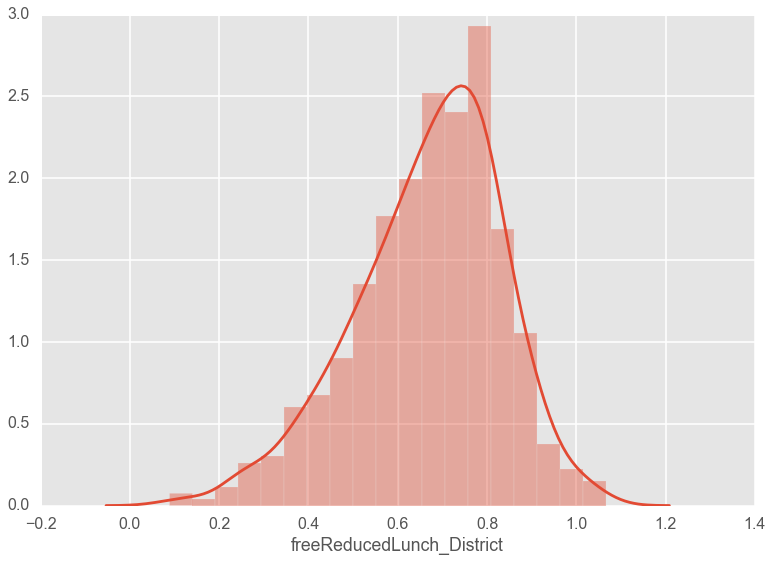

In [173]:
import seaborn as sns
sns.distplot(districtData2014['freeReducedLunch_District'])

districtData2014[['freeReducedLunch_District']].quantile([0,.33,0.5,.66,1])

sns.distplot(districtData2014['yearsExperienceTeachers_District'])

districtData2014[['yearsExperienceTeachers_District']].quantile([0,.33,0.5,.66,1])

### StudentTeacherRatio

- This feature is created from the total students enrolled and total teachers. It has fairly normal distribution, as shown below, with few outliers in the right

- low_StudentTeacherRatio is a categorical variable created to group those schools with low StudentTeacherRatio from the once above average and see whether schools with low StudentTeacherRatio can be classified using district socioeconomic data


,StudentTeacherRatio
0.00,6.510682
0.33,15.141321
0.50,16.298312
0.66,17.110924
1.00,50.529412


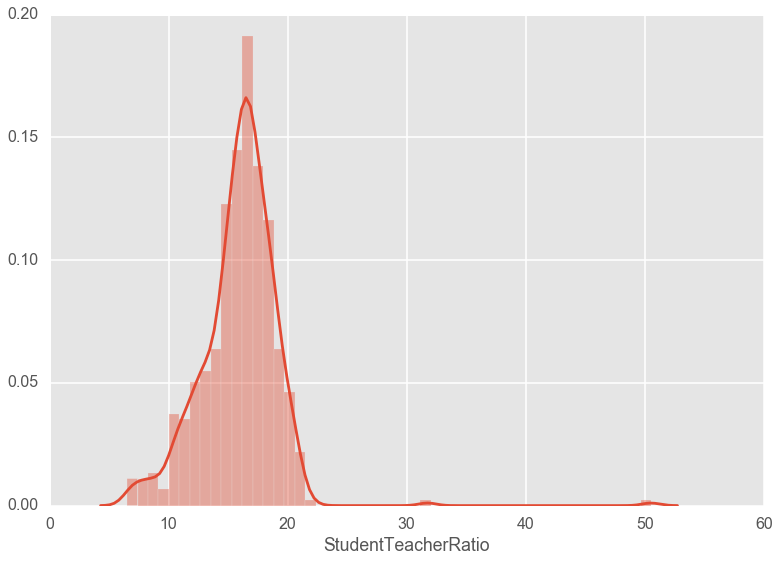

In [174]:
districtData2014['low_StudentTeacherRatio'] =(districtData2014['StudentTeacherRatio']
                                     <districtData2014['StudentTeacherRatio'].mean()).astype(int)
sns.distplot(districtData2014['StudentTeacherRatio'])

districtData2014[['StudentTeacherRatio']].quantile([0,.33,0.5,.66,1])



<p><a href="#top">Return to top</a></p>
<a id="dataPreparation"></a>
## Business Understanding (10 points)

<em>Describe the purpose of the data set you selected, i.e., why was the data collected in the first place. Describe how you would define and measure the outcomes from the data set, i.e., why is this data important and how do you know if you have mined useful knowledge from the data set? How would you measure the effectiveness of a good prediction algorigthm? Be specific.</em>

The data used for this assignment was aggregated and published by the <a href="https://www.ok.gov/oeqa/About_OEQA/"> Office of Educational Quality and Accountability</a>, an Oklahoma agency that provides statistical information about the state's public schools. The data comprises 18 Excel files containing information published annually in the agency's <a href="https://www.ok.gov/oeqa/School_&_District_Profiles_Reports/index.html">Oklahoma School Profiles Reports</a>. The data contains information from 1997 to 2014. The Excel files were e-mailed March 22, 2016.

Jeff Wallace, assistant director of educational accountability, explained on March 22, 2016, (the same day the files were e-mailed) that the purpose of collecting and publishing the data is to provide citizens and legislators with quantiative descriptions of Oklahoma's public schools. While the data contains many of the same variables each year, some variables are changed, i.e., added or removed, because of legislative changes or prevailing public sentiment about public education. For example, the 2014 data contains xxxxx; the 1997 data does not contain these variables.

The agency's website explains that the variables in the School Profiles quantify three constructs: community characteristics, educational process and student performance.

## Data Preparation
<a id="defineAndPrepare"></a>
### "Define and prepare ..."
<strong>[10 points]</strong> <em> This project looks at school data at a ditrict level.Two set of data are created using the features available at a district level. The subset data from the district school data used for clustering are :

1.<strong> The demographic Data</strong> - The features that explain the ethinic diversity is highly related to the the free/reduced lunch perecentage. This subset data has the composition of ethnicity given as a percentage of the total student population i.e. White, Black, Hispanic, Asian and Native American by percentage. Free/Reduced Lunch is also mentioned as the  percentage of the total student population who are given free/reduced lunch. As shown above ethinicity is highly correlated to Free/Reduced lunch and this correlated features will be clustered with different techniques to produced a better dicertized  feature that will be used with other features to classify schools whther they belong to student to teacher ratio low or high category. The intention of anlysing of this data will be if the schools with low or high student to teacher ratio can be classified using clustered features along with other features at a district level .

2.<strong>School Achievment data</strong> - The features for education attainment of schools in the district care measured using features such as number of students who continued to have college and above degrees, Non College degree and less than 12 grade. Again this features will be clustered and used in the classification model to see if model accuracy is improved </em>



In [175]:
schoolAttributes = ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District',
                    'educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','averageSalaryTeachers_District',
                    'advancedDegreeTeachers_District','studentsInSpecialEd_District','studentsInELL_District',
                    'specialEdTeachersFTE_District','counselorsFTE_District',
                    'otherProfessionalStaffFTE_District','administratorsFTE_District','yearsExperienceTeachers_District',
                    'averagePropertyValuePerADM_District','population_District',
                    'averageHouseholdIncome_District','unemploymentRate_District','povertyRate_District',
                    'singleParentFamilies_District','freeReducedLunch_District', 'low_StudentTeacherRatio']
District_school = districtData2014[schoolAttributes]

District_school.shape


(517, 25)

### Classification of low teacher student ratio at a district level using clustering discretization
Training and testing set split
"... (use 80/20 training/testing split for your data."

In [268]:
District_school = districtData2014[schoolAttributes]
y = District_school['low_StudentTeacherRatio'].values
del District_school['low_StudentTeacherRatio'] 
X = District_school.values

<p><a href="#top">Return to top</a></p>
<a id="chooseTheMethod"></a>
### "Choose the Method ..."
<strong>[10 points]</strong> <em>Stratification is the process of ensuring each fold is representative of all strata of the data making it a good representative of the whole. As I have binary classification problem where each class comprises close to 50% of the data, it is best to arrange the data such that in every fold, each class comprises around half the instances.stratification is generally a better scheme, both in terms of bias and variance, when compared to regular cross-validation. 

It has been generally agreed that optimum balance of bias variance of data is achieve when data is split into 10 folds.Each fold is then used a validation set once while the 9 remaining fold form the training set The 10 results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.</em>

In [269]:
from sklearn.cross_validation import StratifiedKFold , cross_val_score
num_cv_iterations = 10
num_instances = len(y)
cv_object = StratifiedKFold(y,n_folds=10)

<p><a href="#top">Return to top</a></p>
<a id="chooseAndExplain"></a>
### "Evaluation Metric for classification..."
<strong>[10 points]</strong> <em> Identifying  category of school with low student teacher ratio is classification procedure that we want to be accurate as logistic and budget appropriation requires allocating more resources to the schools with high student-teacher ratio and reducing from the ones with very low  student-teacher ratio . misclassifying the schools into the wrong category will hamper the effectivnes of the model in doing the . Identifying school with low student teacher ratio might be something where we want low false positives (i.e., when we think there is a School with low studentteacher ratio, there should truly be one). Whereas it is equally important to have true negatives (i.e., measures the proportion of negatives, high studentteacher ratio, that are correctly identified as such) as it is important for the district to identify those schools for the purpose of allocating more teachers and budget</em>

<p><a href="#top">Return to top</a></p>
<a id="createThreeDifferent"></a>
### "Logistic Classification Model without using Clustering"
<strong>Classification models </strong> <em> are created below to calssify schools with low student teacher ratio.Model parameters are selected using grid search to maximize generalization performance </em>

## Logit Model 
- with grids_search of the apprpriate parameters to increase generalization
- on standardized data as some features have very high numbers such as house hold income

In [180]:
from sklearn import grid_search
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

lr = LogisticRegression()
# using grid search to come up with optimum combination of parameters.
c_range = np.logspace(-10,10)
penalty=('l1','l2')
lr_clf= grid_search.GridSearchCV(estimator=lr, param_grid=dict(C=c_range, penalty = penalty), n_jobs=1)

std_scl = StandardScaler()


iter_num=0

logAccScores = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object):
#   scaling the data as features like household income have very high numbers
    X_train = X[train_indices]
    y_train = y[train_indices]    
    X_test = X[test_indices]
    y_test = y[test_indices]

    scl_obj = StandardScaler()
    scl_obj.fit(X_train) 
    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test)
    
    lr_clf.fit(X_train_scaled,y_train)  # train object
    y_hat = lr_clf.predict(X_test_scaled) # get test set precitions
#     lr_clf.fit(X[train_indices],y[train_indices])
#     y_hat = lr_clf.predict(X[test_indices])
    conf = mt.confusion_matrix(y[test_indices],y_hat)
    acc = mt.accuracy_score(y[test_indices],y_hat)
    
    print ("====Iteration",iter_num+1," ====")
    print ('Accuracy:', acc) # Overall, how often is the classifier correct?
    logAccScores.append(acc)
    print ('Misclassification:', 1-acc)  #Overall, how often is it wrong?
    print ("Specificity:",conf[0,0]/float(conf[0,1]+conf[0,0])) # When it's actually no, how often does it predict no?
    print ("Precision:",conf[1,1]/float(conf[0,1]+conf[1,1])) # When it predicts yes, how often is it correct?
    print ("Confusion matrix:\n",(conf))   
    print ("\n")
    print("The best classifier is: ", lr_clf.best_estimator_)
    print ("\n")
    print ("Average accuracy score:", sum(logAccScores)/len(logAccScores))

('====Iteration', 1, ' ====')
('Accuracy:', 0.71698113207547165)
('Misclassification:', 0.28301886792452835)
('Specificity:', 0.6333333333333333)
('Precision:', 0.6333333333333333)
('Confusion matrix:\n', array([[19, 11],
       [ 4, 19]]))


('The best classifier is: ', LogisticRegression(C=26.826957952797272, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))


('Average accuracy score:', 0.71698113207547165)
('====Iteration', 2, ' ====')
('Accuracy:', 0.76923076923076927)
('Misclassification:', 0.23076923076923073)
('Specificity:', 0.72413793103448276)
('Precision:', 0.70370370370370372)
('Confusion matrix:\n', array([[21,  8],
       [ 4, 19]]))


('The best classifier is: ', LogisticRegression(C=10.481131341546874, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1,

### Average accuracy  of the classification model without clustering some of its explanatory varaiables
- using the best parameter chosen by the grid search CV

In [243]:
from sklearn.pipeline import make_pipeline
from time import time
    
best_clf =LogisticRegression(C=26.826957952797272, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
start = time()
clf = make_pipeline(StandardScaler(), best_clf)
acc = cross_val_score(clf,X,y=y,cv=cv_object)
print("time it took - %.2f seconds ."  % (time() - start))
print ("Average accuracy = ", acc.mean()*100, "+/-", acc.std()*100)

time it took - 0.15 seconds .
('Average accuracy = ', 73.885355303224344, '+/-', 4.1714096284293465)


## Feature engineering using Clustering 

- let us start by looking at school achievement susbset data to see if the features are correlated and can be clustered

As indicated clearly from the correlaion table and pairplot there is high correlation b/n the features hence clustering seems to be a right thing to do

- lets start by using Kmean clustering


In [382]:
schoolAttributes = ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District',
                    'educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','averageSalaryTeachers_District',
                    'advancedDegreeTeachers_District','studentsInSpecialEd_District','studentsInELL_District',
                    'specialEdTeachersFTE_District','counselorsFTE_District','otherProfessionalStaffFTE_District',
                    'administratorsFTE_District','yearsExperienceTeachers_District','freeReducedLunch_District',
                    'povertyRate_District','singleParentFamilies_District','averagePropertyValuePerADM_District',
                    'population_District','averageHouseholdIncome_District','unemploymentRate_District',
                    'singleParentFamilies_District','freeReducedLunch_District', 'low_StudentTeacherRatio']

achievment =       ['educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','freeReducedLunch_District']
                    
race =             ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District']


District_school = districtData2014[schoolAttributes]

X1 = District_school[achievment]
X2 = District_school[race]

achievment_Corr1 = X1.corr(method='pearson')
achievment_Corr1

,educationalAttainment_collegeAndAbove_District,educationalAttainment_highSchoolNoCollegeDegree_District,educationalAttainment_lessThan12thGrade_District,freeReducedLunch_District,freeReducedLunch_District
educationalAttainment_collegeAndAbove_District,1.000000,-0.680069,-0.563237,-0.503920,-0.503920
educationalAttainment_highSchoolNoCollegeDegree_District,-0.680069,1.000000,-0.222757,0.126051,0.126051
educationalAttainment_lessThan12thGrade_District,-0.563237,-0.222757,1.000000,0.528001,0.528001
freeReducedLunch_District,-0.503920,0.126051,0.528001,1.000000,1.000000
freeReducedLunch_District,-0.503920,0.126051,0.528001,1.000000,1.000000


<p><a href="#top">Return to top</a></p>
<a id="Visualize the any important attributes"></a>

## Visualize the any important attributes
Many features have been visualized in the first project however for this project Race , School achievement and free/reduced lunch features will be visualized as these features are used clustered and used as a discrete features in logit classification model

###  School achievement and free/reduced lunch features 
As shown by the graph below and same indicted above in correlation table free/reduced lunch  percentage is negatively correlated with educationalAttainment_collegeAndAbove_District and postively correlated with the others.

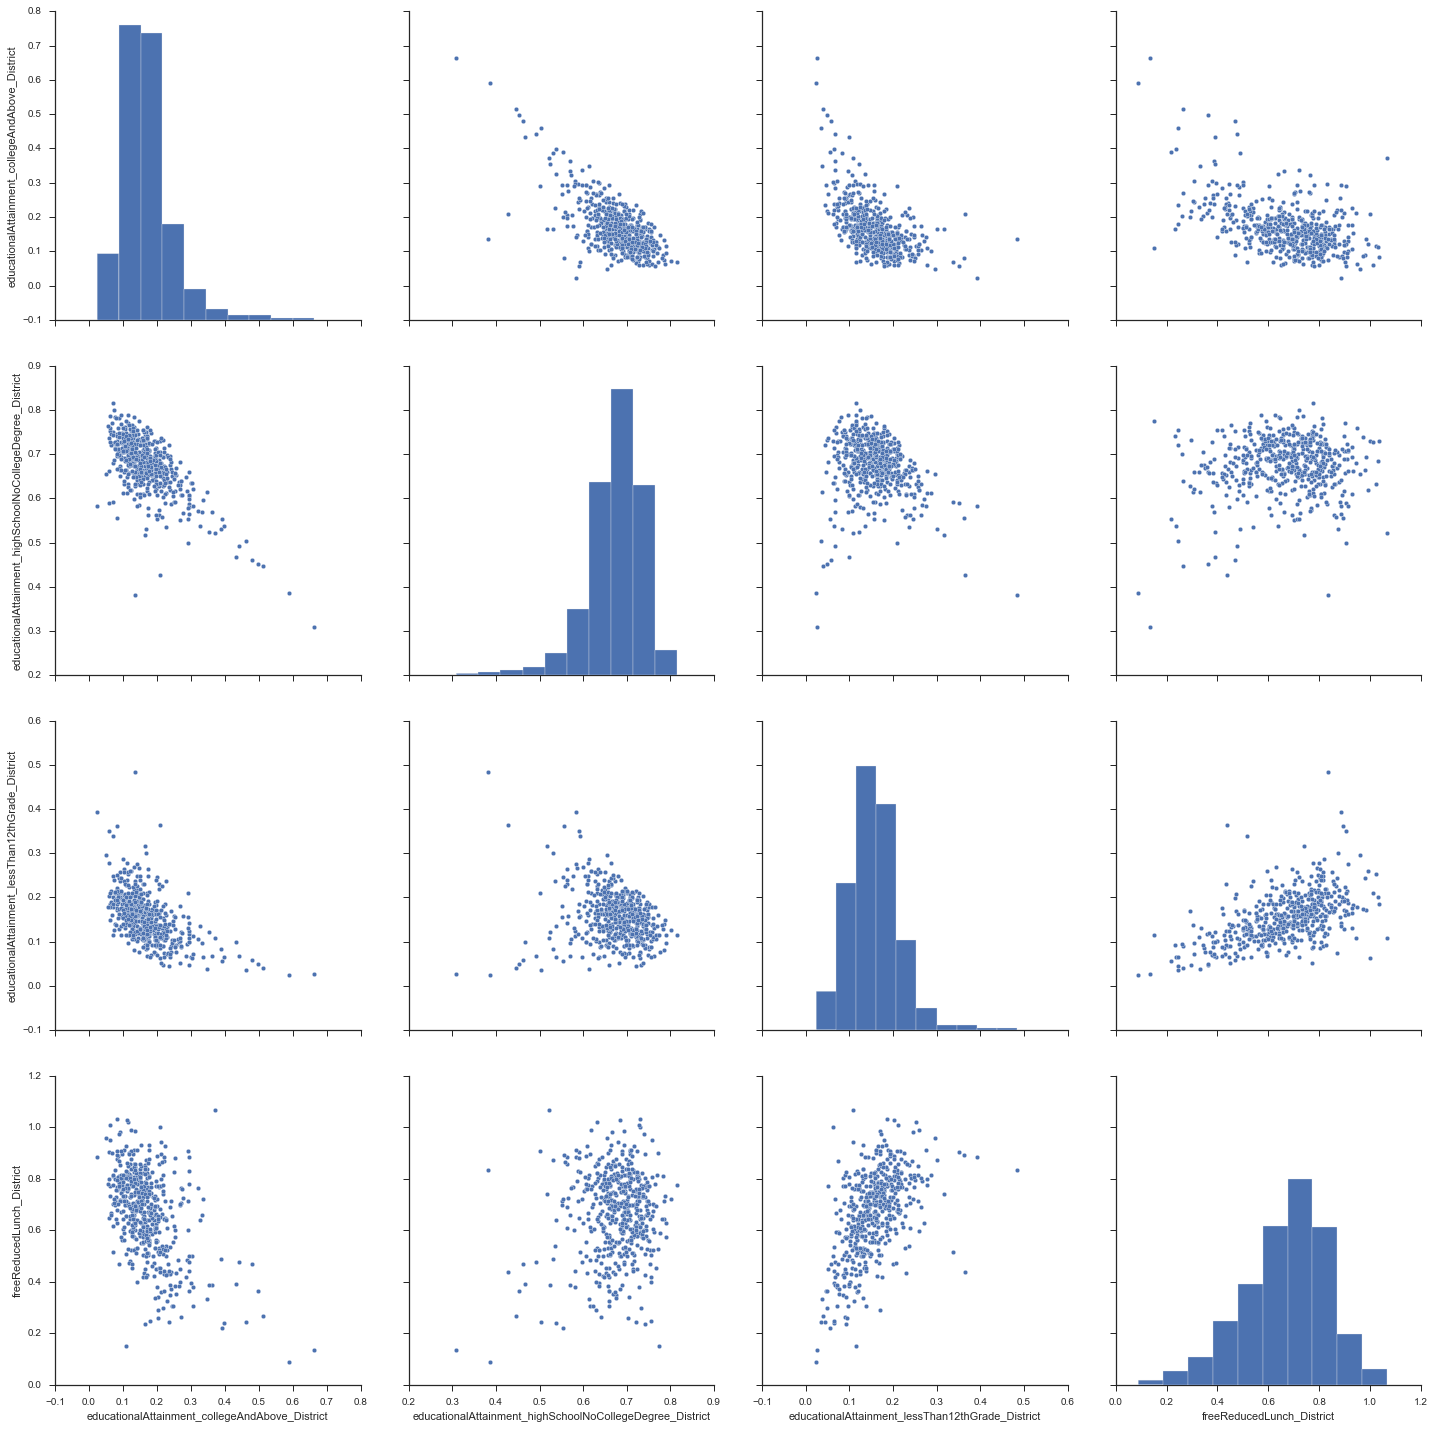

In [213]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
# iris = sns.load_dataset("iris")
g = sns.pairplot(X1, size=5, )

## Race 
As shown below in the pairplot all races except whiteothers are skewed to the right showing that blacks,hispanics, asians and native americans are concentrated in few counties whereas whites are fairly distrubuted in all counties. There is such a high negative correlation between white and native american

In [383]:
achievment_Corr2 = X2.corr(method='pearson')
achievment_Corr2

,whiteOther_District,black_District,asian_District,hispanic_District,nativeAmerican_District
whiteOther_District,1.000000,-0.267848,-0.015613,-0.168776,-0.749398
black_District,-0.267848,1.000000,0.153855,0.109746,-0.157141
asian_District,-0.015613,0.153855,1.000000,0.129127,-0.165714
hispanic_District,-0.168776,0.109746,0.129127,1.000000,-0.434545
nativeAmerican_District,-0.749398,-0.157141,-0.165714,-0.434545,1.000000


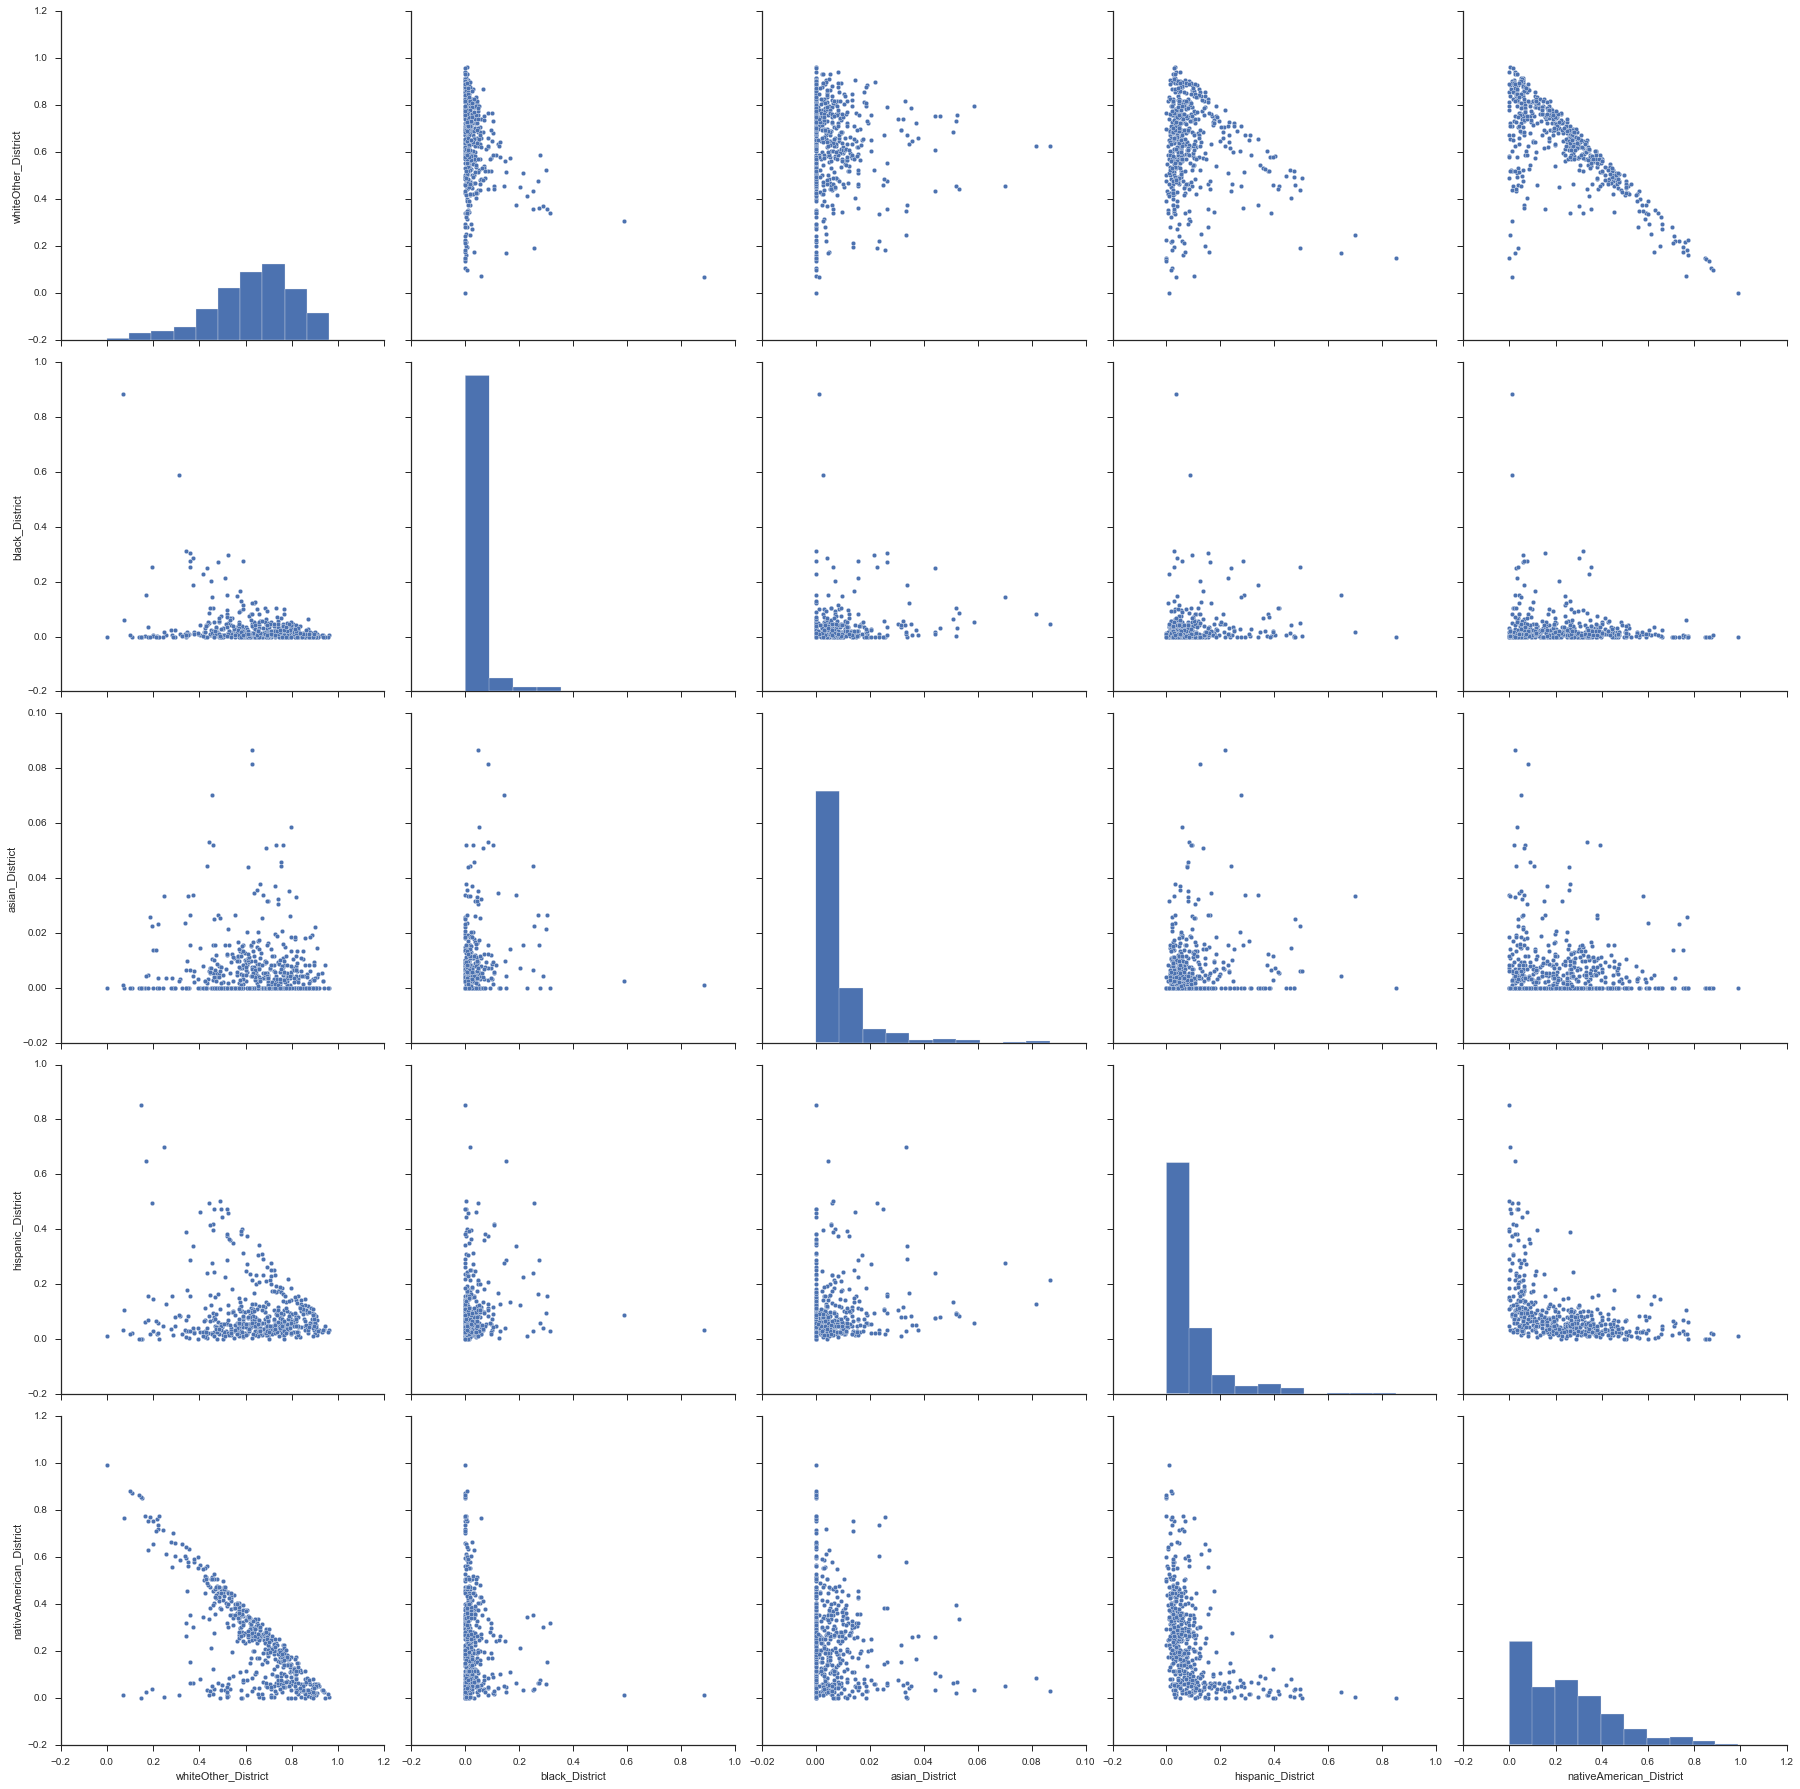

In [386]:
sns.set(style="ticks", color_codes=True)
# iris = sns.load_dataset("iris")
g = sns.pairplot(X2, size=5, )

### Discretization using cluster

This particular discretization,the average accuracy of the folds has increased by 1.4, but the deviation from the mean has also increased by  about 0.75 . Let's now try different parameters to get better discretization of the features.

In [223]:
schoolAttributes = ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District',
                    'educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','averageSalaryTeachers_District',
                    'advancedDegreeTeachers_District','studentsInSpecialEd_District','studentsInELL_District',
                    'specialEdTeachersFTE_District','counselorsFTE_District','otherProfessionalStaffFTE_District',
                    'administratorsFTE_District','yearsExperienceTeachers_District','freeReducedLunch_District',
                    'povertyRate_District','singleParentFamilies_District','averagePropertyValuePerADM_District',
                    'population_District','averageHouseholdIncome_District','unemploymentRate_District',
                    'singleParentFamilies_District','freeReducedLunch_District', 'low_StudentTeacherRatio']
achievment =       ['educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','freeReducedLunch_District']
                    
District_school = districtData2014[schoolAttributes]

X1 = District_school[achievment]
y = District_school['low_StudentTeacherRatio'].values
# del District_school[school] 
achievment.append('low_StudentTeacherRatio')
District_school = District_school.drop(achievment, axis=1)
X = District_school.values

cls = KMeans(n_clusters=8, init='k-means++',random_state=1)
cls.fit(X1) 
labels = cls.labels_ # the labels from kmeans clustering
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


X = np.column_stack((X,pd.get_dummies(labels)))
acc = cross_val_score(clf,X,y=y,cv=cv_object)

print ("Average accuracy (with kmeans for school attainment)= ", acc.mean()*100, "+-", acc.std()*100)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X1, labels))

('Average accuracy (with kmeans for school attainment)= ', 75.250220552662284, '+-', 4.9472756281646397)
Estimated number of clusters: 8
Silhouette Coefficient: 0.278


<p><a href="#top">Return to top</a></p>
<a id="Train and adjust parameters"></a>

## Varying the parameters to get better discretization  

The result shows 8 cluster gives the best possible performance, but not quite an improvement as the STD deviations increase offset the mean accuracy increase. 
- I will try to combine different clusters by adding one more clusters from demographic features in an effort to improve the classification model before that let us assess the cluster validity

('Clusters', 2, 'Average accuracy = ', 74.84326531773813, '+-', 5.1028150714488119)
('Clusters', 3, 'Average accuracy = ', 75.054142121289729, '+-', 4.4778970277192425)
('Clusters', 4, 'Average accuracy = ', 75.631207490253004, '+-', 4.5707773625559307)
('Clusters', 5, 'Average accuracy = ', 75.046885227240395, '+-', 4.1080354879154504)
('Clusters', 6, 'Average accuracy = ', 72.923816841685877, '+-', 4.6374165300468544)
('Clusters', 7, 'Average accuracy = ', 74.277512165969441, '+-', 5.0249621717812527)
('Clusters', 8, 'Average accuracy = ', 75.250220552662284, '+-', 4.9472756281646397)
('Clusters', 9, 'Average accuracy = ', 74.86937590711176, '+-', 5.0141519884194414)
('Clusters', 10, 'Average accuracy = ', 74.280998320953927, '+-', 5.8811752671642399)
('Clusters', 11, 'Average accuracy = ', 73.127152167107766, '+-', 5.2625442229307682)
('Clusters', 12, 'Average accuracy = ', 74.099860553800625, '+-', 5.8873238839308755)
('Clusters', 13, 'Average accuracy = ', 73.138322092262158, '+-'

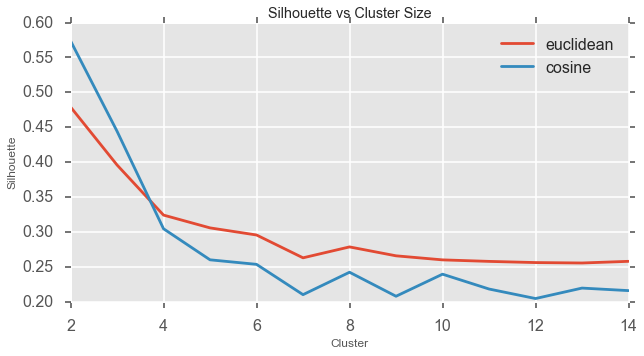

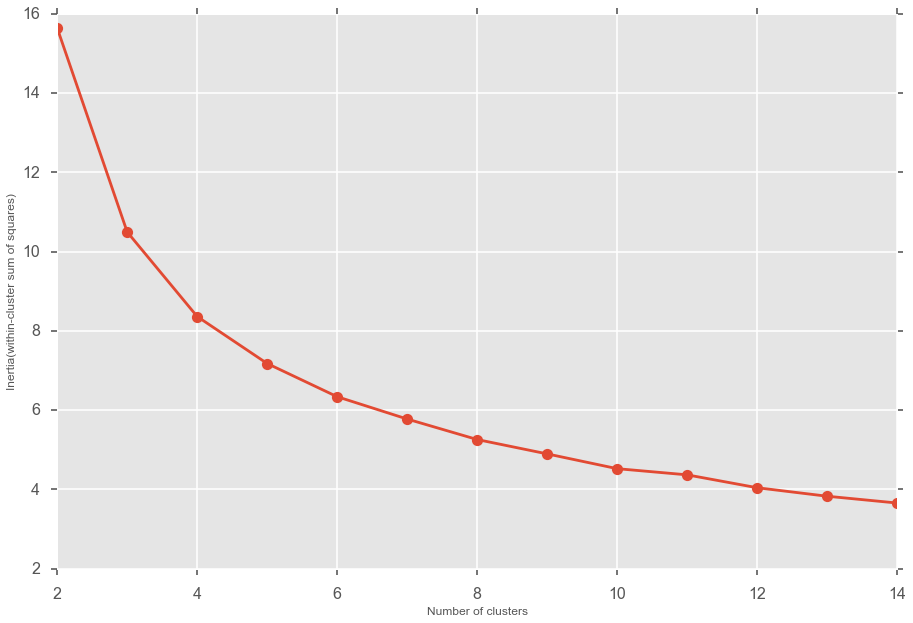

In [258]:
schoolAttributes = ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District',
                    'educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','averageSalaryTeachers_District',
                    'advancedDegreeTeachers_District','studentsInSpecialEd_District','studentsInELL_District',
                    'specialEdTeachersFTE_District','counselorsFTE_District','otherProfessionalStaffFTE_District',
                    'administratorsFTE_District','yearsExperienceTeachers_District','freeReducedLunch_District',
                    'povertyRate_District','singleParentFamilies_District','averagePropertyValuePerADM_District',
                    'population_District','averageHouseholdIncome_District','unemploymentRate_District',
                    'singleParentFamilies_District','freeReducedLunch_District', 'low_StudentTeacherRatio']
achievment =        ['educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','freeReducedLunch_District']
                    

District_school = districtData2014[schoolAttributes]

X1 = District_school[achievment]
y = District_school['low_StudentTeacherRatio'].values
# del District_school[school] 
achievment.append('low_StudentTeacherRatio')
District_school = District_school.drop(achievment, axis=1)
X = District_school.values

params = []
seuclid = []
scosine = []
distortions = []

z = range(2,15)
for n_achievement in k:

    # append on the clustering
    cls_achievment = KMeans(n_clusters=n_achievement, init='k-means++',random_state=1)
    cls_achievment.fit(X1)
    labels = cls_achievment.labels_ # the labels from kmeans clustering
    seuclid.append(metrics.silhouette_score(X1, labels, metric='euclidean'))
    scosine.append(metrics.silhouette_score(X1, labels, metric='cosine'))
    distortions.append(cls_achievment.inertia_)

    X4 = np.column_stack((X,pd.get_dummies(labels)))

    acc = cross_val_score(clf,X4,y=y,cv=cv_object)
    params.append((n_achievement,acc.mean()*100,acc.std()*100)) # save state

    print ("Clusters",n_achievement,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)
    
plt.figure(figsize=(10,5))
plt.plot(k,seuclid,label='euclidean')
plt.plot(k,scosine,label='cosine')
plt.ylabel("Silhouette")
plt.xlabel("Cluster")
plt.title("Silhouette vs Cluster Size")
plt.legend()
plt.show()

plt.plot(k, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia(within-cluster sum of squares)')
plt.tight_layout()
plt.show()    


<p><a href="#top">Return to top</a></p>
<a id="Evaluate and Compare"></a>

### Ealuating Performance

<Strong>Inertia</Strong> : also called the within-cluster sum of squares criterion can be recognized as a measure of how internally coherent clusters are. As indicated by the graph above the inertia steadily drops with cluster increase and reaches the lowest at 14  cluster . This metric has various drawbacks
  - Not a normalized metric and tends to get bigger for high dimension data
  - It assumes the data is convex and isotopic 
  
 This drawbacks makes this meteric invalid for evaluation where non globular data is being clustered

<Strong>Silhouette Coefficient </Strong>: In  this case where ground truth labels are not known, evaluation must be performed using the model itself, where a higher Silhouette Coefficient score relates to a model with better defined clusters( well separated). In the above class the prefered distance meteric is eculidian as it makes sense to measure the shortest distance between 2 instances with same attributes as opposed to cosine distance which measures similarity between two non zero vectors. As expected in the above silhouette graph it is the highest where the cluster is only 2 and it drastically drops  and but then increase again at abou 8. In this graph if a above 4 clusters are giving better performance 8 is the best cluster model which is also reflected by the performance of the classification model where it show higher accuracy and lower deviation when 8 cluster model is used
<Strong> Stability</Strong>: clustering is stable for your data when hav many runs give relatively similar results. Random Intialization problem that gives rise to unstable results with K means clustering is taken care of by the use of K-means ++ where the intial centroids are made as far apart as possible

<Strong>Similarity or correlation matrix</Strong>: measures similarity between one instance and every other instance. In the graph below there seems to be randomness in similarity eventhough there are few well defined edges along the diagonal showing some clusters are globular. Again this metric has a drawback of asuming data is globular in nature


### Similarity Matrix

Wall time: 3 ms


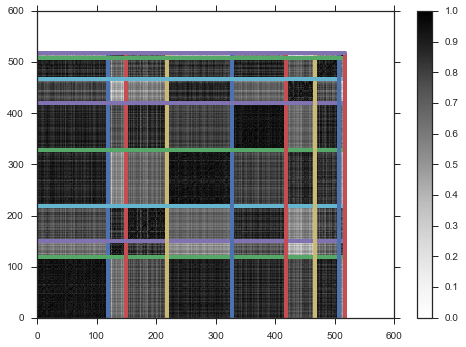

In [218]:

# plot the similarity matrix for the cluster
cls = KMeans(n_clusters=8, init='k-means++',random_state=1)
cls.fit(X1)
labels = cls.labels_

# plot the similarity matrix
y=labels
idx_sorted = np.argsort(y,kind="quicksort")  # need to get the ordering of Y
data_sorted = X1.values[idx_sorted]  # sort the dataset by class
%time R = pairwise.euclidean_distances(data_sorted)  # calculate the similarity

#transform distance to similarity
min_r = np.min(R)
max_r = np.max(R)
R = 1-(R-min_r)/(max_r-min_r)

# plt.figure(figsize=(20,10))
pyplot.pcolormesh(R)
pyplot.colorbar()

# plot class boundaries
bounds = np.cumsum([np.sum(y==val) for val in np.unique(y)])
for b in bounds:
    pyplot.plot([b,b],[0, len(y)], linewidth=4)
    pyplot.plot([0, len(y)],[b,b],linewidth=4)

pyplot.show()

### Trying to emebded more Clustering
- Let us cluster the demographic data and combine is with achievment data to see if it improves the overall classification accuracy

- discretization using the combined clusters from the race and achievment subset data has significantly increased the average accuracy of the folds by 2.8 to 76.59, and also maintained the deviation from the mean about the same (4.15) as the classification model without any clustering giving the model overall performance improvement. 

In [303]:
schoolAttributes = ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District',
                    'educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','averageSalaryTeachers_District',
                    'advancedDegreeTeachers_District','studentsInSpecialEd_District','studentsInELL_District',
                    'specialEdTeachersFTE_District','counselorsFTE_District',
                    'otherProfessionalStaffFTE_District','administratorsFTE_District','yearsExperienceTeachers_District',
                    'freeReducedLunch_District','averagePropertyValuePerADM_District','population_District',
                    'averageHouseholdIncome_District','unemploymentRate_District','povertyRate_District',
                    'singleParentFamilies_District','low_StudentTeacherRatio']

achievment =       ['educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','freeReducedLunch_District']

race =             ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District']


District_school = districtData2014[schoolAttributes]

X1 = District_school[achievment]
X2 = District_school[race]
y = District_school['low_StudentTeacherRatio'].values
# del District_school[school] 
achievment.extend(race)
achievment.append('low_StudentTeacherRatio')
District_school = District_school.drop(achievment, axis=1)
X = District_school.values

params = []
for n_achievment in range(5,9):
    for n_race in range(2,8):
        # get the first clustering
        cls_achievment = KMeans(n_clusters=n_achievment, init='k-means++',random_state=1)
        cls_achievment.fit(X1)
        newfeature_achievment = cls_achievment.labels_ # the labels from kmeans clustering

        # append on the second clustering
        cls_race = KMeans(n_clusters=n_race, init='k-means++',random_state=1)
        cls_race.fit(X2)
        newfeature_race = cls_race.labels_ # the labels from kmeans clustering


        X3 = np.column_stack((X,pd.get_dummies(newfeature_achievment),pd.get_dummies(newfeature_race)))

        acc = cross_val_score(clf,X3,y=y,cv=cv_object)
        params.append((n_achievment,n_race,acc.mean()*100,acc.std()*100)) # save state

        print ("Clusters",n_achievment,n_race,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

('Clusters', 5, 2, 'Average accuracy = ', 76.016392043029114, '+-', 5.558810954845729)
('Clusters', 5, 3, 'Average accuracy = ', 75.82045590369674, '+-', 6.0170178656063396)
('Clusters', 5, 4, 'Average accuracy = ', 76.012621303964266, '+-', 6.1963052201272699)
('Clusters', 5, 5, 'Average accuracy = ', 75.23947750362845, '+-', 4.8831309816998392)
('Clusters', 5, 6, 'Average accuracy = ', 74.658783687640522, '+-', 4.0172908181781866)
('Clusters', 5, 7, 'Average accuracy = ', 75.642661999487743, '+-', 5.0588232682404417)
('Clusters', 6, 2, 'Average accuracy = ', 76.219585076410823, '+-', 5.2063496754177212)
('Clusters', 6, 3, 'Average accuracy = ', 76.411892768718531, '+-', 5.6042587216026059)
('Clusters', 6, 4, 'Average accuracy = ', 76.212043598281113, '+-', 6.3287879544311183)
('Clusters', 6, 5, 'Average accuracy = ', 76.788966675204193, '+-', 5.2505297604825936)
('Clusters', 6, 6, 'Average accuracy = ', 76.200873673126722, '+-', 4.9260336969601273)
('Clusters', 6, 7, 'Average accurac

<p><a href="#top">Return to top</a></p>
<a id="Visualize Results"></a>
### Visulaizing the Clusters 

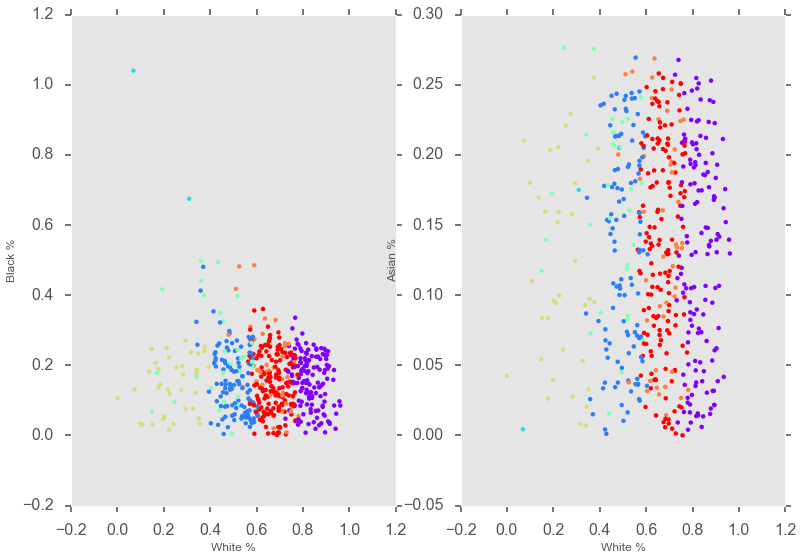

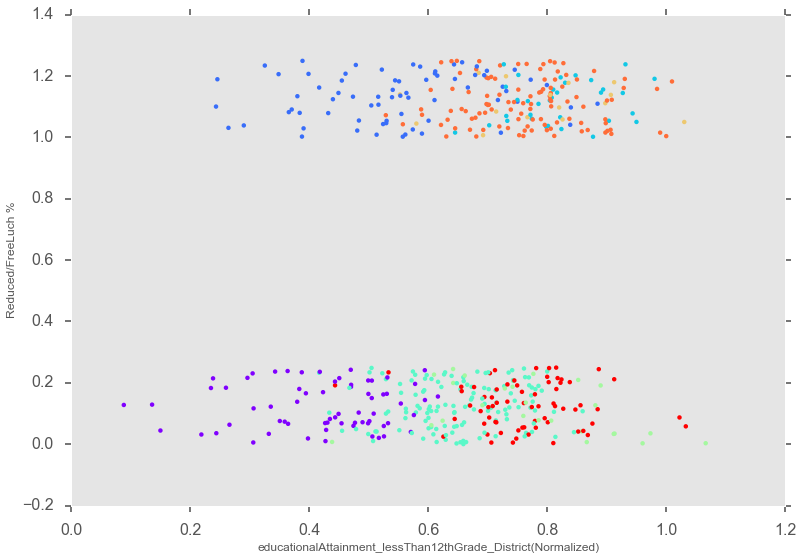

In [304]:
n_achievment=8
n_race=7

District_school = districtData2014[schoolAttributes]

X1 = District_school[achievment]
X2 = District_school[race]
y = District_school['low_StudentTeacherRatio'].values
# del District_school[school] 
achievment.extend(race)
achievment.append('low_StudentTeacherRatio')
District_school = District_school.drop(achievment, axis=1)
X = District_school.values

cls_achievment = KMeans(n_clusters=n_achievment, init='k-means++',random_state=1)
cls_achievment.fit(X1)
newfeature_achievment = cls_achievment.labels_ # the labels from kmeans clustering

# append on the second clustering
cls_race = KMeans(n_clusters=n_race, init='k-means++',random_state=1)
cls_race.fit(X2)
newfeature_race = cls_race.labels_ # the labels from kmeans clustering

plt.style.use('ggplot')
plt.figure()
plt.subplot(1,2,1)
X2=X2.values
plt.scatter(X2[:, 0], X2[:, 1]+np.random.random(X2[:, 1].shape)/4, c=newfeature_race, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('White %'), plt.ylabel('Black %')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(X2[:, 0], X2[:, 2]+np.random.random(X2[:, 2].shape)/4, c=newfeature_race, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('White %'), plt.ylabel('Asian %')
plt.grid()

X1=X1.values
plt.figure()
plt.scatter(X1[:, 3], X1[:, -1]+np.random.random(X1[:, -1].shape)/4, c=newfeature_achievment, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('educationalAttainment_lessThan12thGrade_District(Normalized)'), plt.ylabel('Reduced/FreeLuch %')
plt.grid()

The scatter plot above shows a visually good cluster separartion for the demographic(race) data however the clusters for school achievement in relation to free/reduced luch does nor look satisfactory. There are clearly two cluster for free/reduced luch one very high and others in very low range. Let us try different clustering alogrithim to see if clustering can be improved

## Trying  Aglomerative clustering  for better performance

- try agglomerative clustering in both subset of data i.e on achievment (X1) and race (X2)

In [262]:
schoolAttributes = ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District',
                    'educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','averageSalaryTeachers_District',
                    'advancedDegreeTeachers_District','studentsInSpecialEd_District','studentsInELL_District',
                    'specialEdTeachersFTE_District','counselorsFTE_District',
                    'otherProfessionalStaffFTE_District','administratorsFTE_District','yearsExperienceTeachers_District',
                    'freeReducedLunch_District','averagePropertyValuePerADM_District','population_District',
                    'averageHouseholdIncome_District','unemploymentRate_District','povertyRate_District',
                    'singleParentFamilies_District','low_StudentTeacherRatio']

achievment =       ['educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','freeReducedLunch_District']

race =             ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District']

District_school = districtData2014[schoolAttributes]

X1 = District_school[achievment]
y = District_school['low_StudentTeacherRatio'].values
achievment.append('low_StudentTeacherRatio')
District_school = District_school.drop(achievment, axis=1)
X = District_school.values

params = []
for link in ['ward', 'complete', 'average']:
    for n_achievement in range(2,10):

        # append on the clustering
        cls_achievment = AgglomerativeClustering(n_clusters=n_achievement, linkage=link)
        cls_achievment.fit(X1)
        newfeature_achievment = cls_achievment.labels_ # the labels from AgglomerativeClustering clustering


        X5 = np.column_stack((X,pd.get_dummies(newfeature_achievment)))

        acc = cross_val_score(clf,X5,y=y,cv=cv_object)
        params.append((n_achievement,acc.mean()*100,acc.std()*100)) # save state

        print ("C=",n_achievement,link,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

('C=', 2, 'ward', 'Average accuracy = ', 74.273741426904579, '+-', 4.7519418187481612)
('C=', 3, 'ward', 'Average accuracy = ', 74.466049119212272, '+-', 4.4982820747723782)
('C=', 4, 'ward', 'Average accuracy = ', 74.462420672187605, '+-', 4.3587248739514077)
('C=', 5, 'ward', 'Average accuracy = ', 74.654870656535479, '+-', 4.7258453284308661)
('C=', 6, 'ward', 'Average accuracy = ', 74.473875181422343, '+-', 3.171986374599574)
('C=', 7, 'ward', 'Average accuracy = ', 74.288824383164012, '+-', 3.7725610259629221)
('C=', 8, 'ward', 'Average accuracy = ', 74.288824383164012, '+-', 3.873132029715074)
('C=', 9, 'ward', 'Average accuracy = ', 74.29245283018868, '+-', 4.2059615677420279)
('C=', 2, 'complete', 'Average accuracy = ', 74.85080679586784, '+-', 4.0749332898768937)
('C=', 3, 'complete', 'Average accuracy = ', 74.850664503827659, '+-', 4.3272570515633966)
('C=', 4, 'complete', 'Average accuracy = ', 75.623808304163461, '+-', 4.4483850222806174)
('C=', 5, 'complete', 'Average accu

The aglomerative clustering on only the achievment data has better performance than K-means clustering on only the achievment data alone but not better than the combined K means cluster on both achievment and race. 

In [294]:
schoolAttributes = ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District',
                    'educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','averageSalaryTeachers_District',
                    'advancedDegreeTeachers_District','studentsInSpecialEd_District','studentsInELL_District',
                    'specialEdTeachersFTE_District','counselorsFTE_District',
                    'otherProfessionalStaffFTE_District','administratorsFTE_District','yearsExperienceTeachers_District',
                    'freeReducedLunch_District','averagePropertyValuePerADM_District','population_District',
                    'averageHouseholdIncome_District','unemploymentRate_District','povertyRate_District',
                    'singleParentFamilies_District','low_StudentTeacherRatio']

achievment =       ['educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','freeReducedLunch_District']

race =             ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District']

District_school = districtData2014[schoolAttributes]

X2 = District_school[race]
y = District_school['low_StudentTeacherRatio'].values
race.append('low_StudentTeacherRatio')
District_school = District_school.drop(race, axis=1)
X = District_school.values

params = []
for link in ['ward', 'complete', 'average']:
    for n_achievement in range(2,10):

        # append on the clustering
        cls_achievment = AgglomerativeClustering(n_clusters=n_achievement, linkage=link)
        cls_achievment.fit(X2)
        newfeature_achievment = cls_achievment.labels_ # the labels from AgglomerativeClustering clustering


        X5 = np.column_stack((X,pd.get_dummies(newfeature_achievment)))

        acc = cross_val_score(clf,X5,y=y,cv=cv_object)
        params.append((n_achievement,acc.mean()*100,acc.std()*100)) # save state

        print ("C=",n_achievement,link,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

('C=', 2, 'ward', 'Average accuracy = ', 74.092888243831652, '+-', 5.2091584334950092)
('C=', 3, 'ward', 'Average accuracy = ', 74.66255442670537, '+-', 4.4440624277279115)
('C=', 4, 'ward', 'Average accuracy = ', 74.862119013062411, '+-', 5.2349362525718739)
('C=', 5, 'ward', 'Average accuracy = ', 73.704502120151389, '+-', 4.5385986429224037)
('C=', 6, 'ward', 'Average accuracy = ', 73.493483024559609, '+-', 3.5091804676186484)
('C=', 7, 'ward', 'Average accuracy = ', 73.308432226301264, '+-', 3.7208476138405584)
('C=', 8, 'ward', 'Average accuracy = ', 73.504510657673819, '+-', 3.6227039392827405)
('C=', 9, 'ward', 'Average accuracy = ', 73.500739918608957, '+-', 4.0382471609377637)
('C=', 2, 'complete', 'Average accuracy = ', 74.858490566037744, '+-', 4.1236361083117403)
('C=', 3, 'complete', 'Average accuracy = ', 74.858490566037744, '+-', 4.4745429648827342)
('C=', 4, 'complete', 'Average accuracy = ', 75.043399072255895, '+-', 4.1186800708484643)
('C=', 5, 'complete', 'Average a

The aglomerative clustering on only the race data has less performance as compared to the combined K means cluster on both achievment and race.

## K-means - Agglomerative combination weaker than Kmean - Kmeans combination

- Since achievment cluster performed better with agglomerative alogorithm and race cluster with K-means++ , let's combine both and see the performance

In [305]:
schoolAttributes = ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District',
                    'educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','averageSalaryTeachers_District',
                    'advancedDegreeTeachers_District','studentsInSpecialEd_District','studentsInELL_District',
                    'specialEdTeachersFTE_District','counselorsFTE_District',
                    'otherProfessionalStaffFTE_District','administratorsFTE_District','yearsExperienceTeachers_District',
                    'freeReducedLunch_District','averagePropertyValuePerADM_District','population_District',
                    'averageHouseholdIncome_District','unemploymentRate_District','povertyRate_District',
                    'singleParentFamilies_District','low_StudentTeacherRatio']

achievment =       ['educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','freeReducedLunch_District']

race =             ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District']


District_school = districtData2014[schoolAttributes]

X1 = District_school[achievment]
X2 = District_school[race]
y = District_school['low_StudentTeacherRatio'].values
# del District_school[school] 
achievment.extend(race)
achievment.append('low_StudentTeacherRatio')
District_school = District_school.drop(achievment, axis=1)
X = District_school.values

params = []
for n_achievment in range(5,9):
    for n_race in range(2,8):
        # get the first clustering
        cls_achievment = AgglomerativeClustering(n_clusters=n_achievement, linkage='complete')
        cls_achievment.fit(X1)
        newfeature_achievment = cls_achievment.labels_ # the labels from kmeans clustering

        # append on the second clustering
        cls_race = KMeans(n_clusters=n_race, init='k-means++',random_state=1)
        cls_race.fit(X2)
        newfeature_race = cls_race.labels_ # the labels from kmeans clustering


        X3 = np.column_stack((X,pd.get_dummies(newfeature_achievment),pd.get_dummies(newfeature_race)))

        acc = cross_val_score(clf,X3,y=y,cv=cv_object)
        params.append((n_achievment,n_race,acc.mean()*100,acc.std()*100)) # save state

        print ("Clusters",n_achievment,n_race,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

('Clusters', 5, 2, 'Average accuracy = ', 76.201158257207098, '+-', 5.3712443266892604)
('Clusters', 5, 3, 'Average accuracy = ', 75.809143686502182, '+-', 5.3332794380564348)
('Clusters', 5, 4, 'Average accuracy = ', 73.685933008907483, '+-', 5.8493500075446461)
('Clusters', 5, 5, 'Average accuracy = ', 74.647613762486117, '+-', 4.7720457888956975)
('Clusters', 5, 6, 'Average accuracy = ', 74.251686160676172, '+-', 4.1137500943265248)
('Clusters', 5, 7, 'Average accuracy = ', 75.228307578474073, '+-', 3.8334816317514462)
('Clusters', 6, 2, 'Average accuracy = ', 76.201158257207098, '+-', 5.3712443266892604)
('Clusters', 6, 3, 'Average accuracy = ', 75.809143686502182, '+-', 5.3332794380564348)
('Clusters', 6, 4, 'Average accuracy = ', 73.685933008907483, '+-', 5.8493500075446461)
('Clusters', 6, 5, 'Average accuracy = ', 74.647613762486117, '+-', 4.7720457888956975)
('Clusters', 6, 6, 'Average accuracy = ', 74.251686160676172, '+-', 4.1137500943265248)
('Clusters', 6, 7, 'Average accu

The overall performance from the combination was less that the performance by using k-means++ for both race and achievment clusters


  
## Trying  DBSCAN clustering  for better performance   


### Determining Eps and MinPts

- usinng Kth nearest neighbors for all points in data set and plot a graph for Minpts 2 & 4
- Select the best Eps from the graph's natural break point

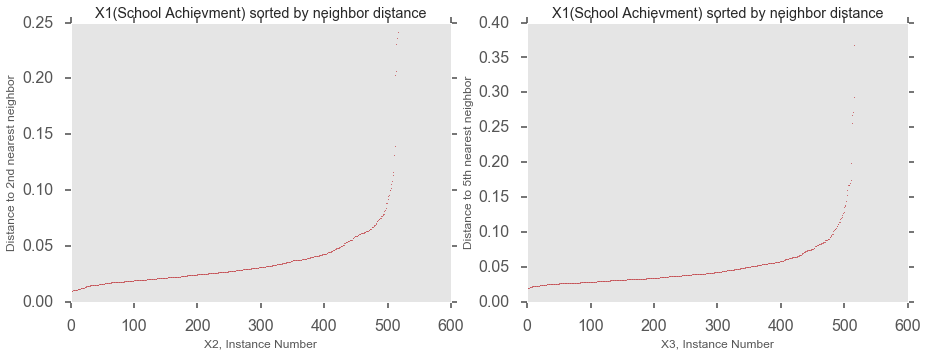

In [263]:
# lets first look at the connectivity of the graphs and distance to the nearest neighbors
from sklearn.neighbors import kneighbors_graph

X2_N = 2
X3_N = 5


# create connectivity graphs before calcualting the hierarchy
X2_knn_graph = kneighbors_graph(X1, X2_N, mode='distance') # calculate distance to four nearest neighbors 
X3_knn_graph = kneighbors_graph(X1, X3_N, mode='distance') # calculate distance to four nearest neighbors 

N2 = X2_knn_graph.shape[0]
X2_4nn_distances = np.zeros((N2,1))
for i in range(N2):
    X2_4nn_distances[i] = X2_knn_graph[i,:].max()

X2_4nn_distances = np.sort(X2_4nn_distances, axis=0)

N3 = X3_knn_graph.shape[0]
X3_4nn_distances = np.zeros((N3,1))
for i in range(N2):
    X3_4nn_distances[i] = X3_knn_graph[i,:].max()

X3_4nn_distances = np.sort(X3_4nn_distances, axis=0)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(N2), X2_4nn_distances, 'r.', markersize=2) #plot the data
plt.title('X1(School Achievment) sorted by neighbor distance')
plt.xlabel('X2, Instance Number')
plt.ylabel('Distance to {0}nd nearest neighbor'.format(X2_N))
plt.grid()

plt.subplot(1,2,2)
plt.plot(range(N3), X3_4nn_distances, 'r.', markersize=2) #plot the data
plt.title('X1(School Achievment) sorted by neighbor distance')
plt.xlabel('X3, Instance Number')
plt.ylabel('Distance to {0}th nearest neighbor'.format(X3_N))
plt.grid()

plt.show()

### DBSCAN only on achievment data - Weak classification performance

In [306]:
schoolAttributes = ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District',
                    'educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','averageSalaryTeachers_District',
                    'advancedDegreeTeachers_District','studentsInSpecialEd_District','studentsInELL_District',
                    'specialEdTeachersFTE_District','counselorsFTE_District',
                    'otherProfessionalStaffFTE_District','administratorsFTE_District','yearsExperienceTeachers_District',
                    'freeReducedLunch_District','averagePropertyValuePerADM_District','population_District',
                    'averageHouseholdIncome_District','unemploymentRate_District','povertyRate_District',
                    'singleParentFamilies_District','low_StudentTeacherRatio']

achievment =       ['educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','freeReducedLunch_District']

race =             ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District']

District_school = districtData2014[schoolAttributes]

X1 = District_school[achievment]
y = District_school['low_StudentTeacherRatio'].values
achievment.append('low_StudentTeacherRatio')
District_school = District_school.drop(achievment, axis=1)
X = District_school.values

params = []
for eps in [0.1, 0.125, 0.15]:
    for mpts in range(2,15):

        # append on the clustering
        cls_achievment = DBSCAN(eps=eps, min_samples=mpts,random_state=1)
        cls_achievment.fit(X1)
        newfeature_achievment = cls_achievment.labels_ # the labels from AgglomerativeClustering clustering


        X5 = np.column_stack((X,pd.get_dummies(newfeature_achievment)))

        acc = cross_val_score(clf,X5,y=y,cv=cv_object)
        params.append((acc.mean()*100,acc.std()*100)) # save state

        print (eps,mpts,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

(0.1, 2, 'Average accuracy = ', 75.242963658612922, '+-', 4.0374498505255909)
(0.1, 3, 'Average accuracy = ', 75.242963658612922, '+-', 4.0374498505255909)
(0.1, 4, 'Average accuracy = ', 74.86937590711176, '+-', 4.3028136705903286)
(0.1, 5, 'Average accuracy = ', 74.273741426904579, '+-', 3.7657995011717857)
(0.1, 6, 'Average accuracy = ', 74.651099917470603, '+-', 3.7833729672917515)
(0.1, 7, 'Average accuracy = ', 74.651099917470603, '+-', 3.7833729672917515)
(0.1, 8, 'Average accuracy = ', 74.651099917470603, '+-', 3.7833729672917515)
(0.1, 9, 'Average accuracy = ', 74.651099917470603, '+-', 3.7833729672917515)
(0.1, 10, 'Average accuracy = ', 74.466191411252453, '+-', 3.6583887762276834)
(0.1, 11, 'Average accuracy = ', 74.466191411252453, '+-', 3.6583887762276834)
(0.1, 12, 'Average accuracy = ', 74.658499103560146, '+-', 4.2848371606016045)
(0.1, 13, 'Average accuracy = ', 74.658499103560146, '+-', 4.2848371606016045)
(0.1, 14, 'Average accuracy = ', 74.658499103560146, '+-', 4.

The DBSCAN clustering on only the achievment data has better performance than K-means clustering on only the achievment data alone on both accuracy mean & STD but not better than the combined K means cluster on both achievment and race.

### DBSCAN only on race data - Weak classification performance 

In [307]:

schoolAttributes = ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District',
                    'educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','averageSalaryTeachers_District',
                    'advancedDegreeTeachers_District','studentsInSpecialEd_District','studentsInELL_District',
                    'specialEdTeachersFTE_District','counselorsFTE_District',
                    'otherProfessionalStaffFTE_District','administratorsFTE_District','yearsExperienceTeachers_District',
                    'freeReducedLunch_District','averagePropertyValuePerADM_District','population_District',
                    'averageHouseholdIncome_District','unemploymentRate_District','povertyRate_District',
                    'singleParentFamilies_District','low_StudentTeacherRatio']

achievment =       ['educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','freeReducedLunch_District']

race =             ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District']

District_school = districtData2014[schoolAttributes]

X2 = District_school[race]
y = District_school['low_StudentTeacherRatio'].values
race.append('low_StudentTeacherRatio')
District_school = District_school.drop(race, axis=1)
X = District_school.values

params = []
for eps in [0.1, 0.125, 0.15]:
    for mpts in range(2,15):

        # append on the clustering
        cls_race = DBSCAN(eps=eps, min_samples=mpts,random_state=1)
        cls_race.fit(X2)
        newfeature_race = cls_race.labels_ # the labels from kmeans clustering


        X7 = np.column_stack((X,pd.get_dummies(newfeature_race)))

        acc = cross_val_score(clf,X7,y=y,cv=cv_object)
        params.append((acc.mean()*100,acc.std()*100)) # save state

        print (eps,mpts,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

(0.1, 2, 'Average accuracy = ', 75.446725860155368, '+-', 4.4927025833548795)
(0.1, 3, 'Average accuracy = ', 75.446725860155368, '+-', 4.4927025833548795)
(0.1, 4, 'Average accuracy = ', 74.854862119013063, '+-', 4.4696753148947259)
(0.1, 5, 'Average accuracy = ', 74.277654458009607, '+-', 5.2984460005548044)
(0.1, 6, 'Average accuracy = ', 74.277654458009607, '+-', 5.2984460005548044)
(0.1, 7, 'Average accuracy = ', 74.277654458009607, '+-', 5.2984460005548044)
(0.1, 8, 'Average accuracy = ', 74.662412134665175, '+-', 5.0474528008956607)
(0.1, 9, 'Average accuracy = ', 74.662412134665175, '+-', 5.0474528008956607)
(0.1, 10, 'Average accuracy = ', 74.662412134665175, '+-', 5.0474528008956607)
(0.1, 11, 'Average accuracy = ', 74.466333703292634, '+-', 4.9340426474252768)
(0.1, 12, 'Average accuracy = ', 74.85849056603773, '+-', 5.1509114926805371)
(0.1, 13, 'Average accuracy = ', 74.103915876945834, '+-', 5.4965941558098148)
(0.1, 14, 'Average accuracy = ', 74.488531261561235, '+-', 5.

The DBSCAN clustering on only the race data has better performance than K-means clustering on only the achievment data alone on both accuracy mean & STD but not better than the combined K means cluster on both achievment and race.

## DBSCAN - DBSCAN combination weaker than Kmean - Kmeans combination

In [342]:
schoolAttributes = ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District',
                    'educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','averageSalaryTeachers_District',
                    'advancedDegreeTeachers_District','studentsInSpecialEd_District','studentsInELL_District',
                    'specialEdTeachersFTE_District','counselorsFTE_District',
                    'otherProfessionalStaffFTE_District','administratorsFTE_District','yearsExperienceTeachers_District',
                    'freeReducedLunch_District','averagePropertyValuePerADM_District','population_District',
                    'averageHouseholdIncome_District','unemploymentRate_District','povertyRate_District',
                    'singleParentFamilies_District','low_StudentTeacherRatio']

achievment =       ['educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','freeReducedLunch_District']

race =             ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District']


District_school = districtData2014[schoolAttributes]

X1 = District_school[achievment]
X2 = District_school[race]
y = District_school['low_StudentTeacherRatio'].values
# del District_school[school] 
achievment.extend(race)
achievment.append('low_StudentTeacherRatio')
District_school = District_school.drop(achievment, axis=1)
X = District_school.values

params = []
for n_achievement in range(2,8):
    for n_race in range(2,8):
        # get the first clustering 
        cls_achievement = DBSCAN(eps=0.1, min_samples=n_achievement,random_state=1)
        cls_achievement.fit(X1)
        newfeature_achievement = cls_achievement.labels_# the labels from kmeans clustering

        # append on the second clustering
        cls_race = DBSCAN(eps=0.15, min_samples=n_race,random_state=1)    
        cls_race.fit(X2)
        newfeature_race = cls_race.labels_

        X3 = np.column_stack((X,pd.get_dummies(newfeature_achievement),pd.get_dummies(newfeature_race)))

        acc = cross_val_score(clf,X3,y=y,cv=cv_object)
        params.append((n_achievement,n_race,acc.mean()*100,acc.std()*100)) # save state

        print ("Clusters",n_achievement,n_race,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

('Clusters', 2, 2, 'Average accuracy = ', 75.232078317538921, '+-', 4.0104135449464797)
('Clusters', 2, 3, 'Average accuracy = ', 75.232078317538921, '+-', 4.0104135449464797)
('Clusters', 2, 4, 'Average accuracy = ', 75.232078317538921, '+-', 4.0104135449464797)
('Clusters', 2, 5, 'Average accuracy = ', 75.431927487976324, '+-', 4.0979111695500681)
('Clusters', 2, 6, 'Average accuracy = ', 75.431927487976324, '+-', 4.0979111695500681)
('Clusters', 2, 7, 'Average accuracy = ', 75.431927487976324, '+-', 4.0979111695500681)
('Clusters', 3, 2, 'Average accuracy = ', 75.232078317538921, '+-', 4.0104135449464797)
('Clusters', 3, 3, 'Average accuracy = ', 75.232078317538921, '+-', 4.0104135449464797)
('Clusters', 3, 4, 'Average accuracy = ', 75.232078317538921, '+-', 4.0104135449464797)
('Clusters', 3, 5, 'Average accuracy = ', 75.431927487976324, '+-', 4.0979111695500681)
('Clusters', 3, 6, 'Average accuracy = ', 75.431927487976324, '+-', 4.0979111695500681)
('Clusters', 3, 7, 'Average accu

The combined DBSCAN clustering on both the achievment and race data has weaker performance on both accuracy mean & STD as compared to  the combined K means cluster on both achievment and race.

### Aggelomerative - DBSCAN combination weaker than Kmean - Kmeans combination
The combined DBSCAN (achievment data) -Agglomerative clustering (race data) has weaker performance on both accuracy mean & STD as compared to  the combined K means cluster on both achievment and race.


In [343]:



# append on the second clustering
cls_achievement = AgglomerativeClustering(n_clusters=8, linkage='ward')
cls_achievement.fit(X1)
newfeature_achievement = cls_achievement.labels_ # the labels from kmeans clustering

# get the first clustering
cls_race = DBSCAN(eps=0.15, min_samples=4,random_state=1)
cls_race.fit(X2)
newfeature_race = cls_race.labels_ # the labels from kmeans clustering


X9 = np.column_stack((X,pd.get_dummies(newfeature_achievement),pd.get_dummies(newfeature_race)))

acc = cross_val_score(clf,X9,y=y,cv=cv_object)

print("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)


('Average accuracy = ', 75.827570505705907, '+-', 4.3879575580845005)


Other possible combinations such as DBSCAN and Kmeans clusterings are tested for performance and the best performance improvement for the classification model is obtained from cluster combinations using k-means++

<p><a href="#top">Return to top</a></p>
<a id="analyzeTheResults"></a>

# Summary
Other possible combinations such as DBSCAN and Kmeans clusterings are tested for performance and the best performance improvement for the classification model is obtained from cluster combinations using k-means++

- The models prediction has improved by almost 2% when we take into consideration that school achievement features are related to the Free/Reduced Lunch kids percentage. Perhaps this is an indicator for the management that more resources are to be allocated where there are more Free/Reduced Lunch kids percentage.

- The race clustering has improved the model as well, which indicates that a certain combination of ethinicity has perhaps high fertility rate giving rise to high student to teacher ratio

- The lack of performance metric that is used by all cluster makes it very difficult to compare clusters produced by different algorithm

- k-means++ is by far the simplest and has various measures of performance metrics such as inertia, Silhouette Coefficient and similarity matrix

- The DBSCAN clustering on only the race data has better performance than K-means clustering on only the achievment data alone on both accuracy mean & STD but not better than the combined K means cluster on both achievment and race. This shows that even though when data is globular in nature density based clustering is better resistant to outliers and noises as compared to K-means clustering algorthim

- Again the aglomerative clustering on only the achievment data out-performs than K-means clustering on only the achievment data alone but not better than the combined K means cluster on both achievment and race. This algorthim has no globularity assumption. Its down side is it assumes every point belongs to a cluster ( no Noise). Finding the right parameter is very iterative for this algorithm and the most difficult of from k means and DBSCAN

- Even though DBSCAN and agglomerative clusters perform better on one set of clustering, It had weak performance when combined with other best perfomer clusters

- The above cluster discretization analysis threw light into the underlying similarities between school achievement metrics and free/reduced lunch and has significantly boosted the logistic classification model accuracy



<p><a href="#top">Return to top</a></p>
<a id="deployment"></a>
## Deployment
* <em>How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?</em>

The classification is useful in allocating resources and budgets to schools using the data available at the district leve.

- One important thing that sticks out from the classification model is that the teachers seem to be equally allocated to schools
irrespective of the district population size resulting with 76 % accuracy that ditricts with high resident counts have high student to teacher ratio. Therefor this calls for managment to allocate teachers in proportion to the district population size

- Deployment - policy makers can deploy the model on randomly selected few schools as test to see if it can perform effcetively. Based on the models performance if found staisfactory, it can be deployed on a wider population of schools. This call for a question on how do we measure the effectivness of the model.

- Mesuring Models Value - Models purpose is to have fair distribution of teachers in accordance to the number of students. The ideal condition is the student teacher ratio for a given school should be equal to the ratio - total number of students in the state / tota number of teacher in the state. When a model is tested on few schools as a test deployment, the total absolute sum of deviations from ideal ratio should be minimized after applying the model on the selected school population

- Model Updates - Many of these variables change by the end of each academic year, it would be important to update the model each year and observe any changes in performance and feature importance

- More Dtata - The model seems to have all the possible varaibles from the educational institute to soscio economical data. But the accuracy of data collection is perhaphs on the most important prdictors of the model is to be improved.





<p><a href="#top">Return to top</a></p>
<a id="ExceptionalWork"></a>

## Exceptional Work

- Elaborated on the different k-means clustering evaluation metrics and expliand there pros and cons
- Used grap to show how to determine optimum Eps and MinPnt for DBSCAN
- Used graph to show inertia on different distance metrics verses cluster nos
- Explained below how Spectral Clustering works supported by graph and performance comparison on classification using spectral clustering discretization

In [380]:
import time
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.4, 's' : 80, 'linewidths':1}


schoolAttributes = ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District',
                    'educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','averageSalaryTeachers_District',
                    'advancedDegreeTeachers_District','studentsInSpecialEd_District','studentsInELL_District',
                    'specialEdTeachersFTE_District','counselorsFTE_District','otherProfessionalStaffFTE_District',
                    'administratorsFTE_District','yearsExperienceTeachers_District','freeReducedLunch_District',
                    'povertyRate_District','singleParentFamilies_District','averagePropertyValuePerADM_District',
                    'population_District','averageHouseholdIncome_District','unemploymentRate_District',
                    'singleParentFamilies_District','freeReducedLunch_District', 'low_StudentTeacherRatio']
achievment =        ['educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','freeReducedLunch_District']
                    

District_school = districtData2014[schoolAttributes]


In [355]:
# Method for polting data using the alogrithim provided

def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[4]+np.random.random(data.T[1].shape)/2, c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)    

7.61755395657


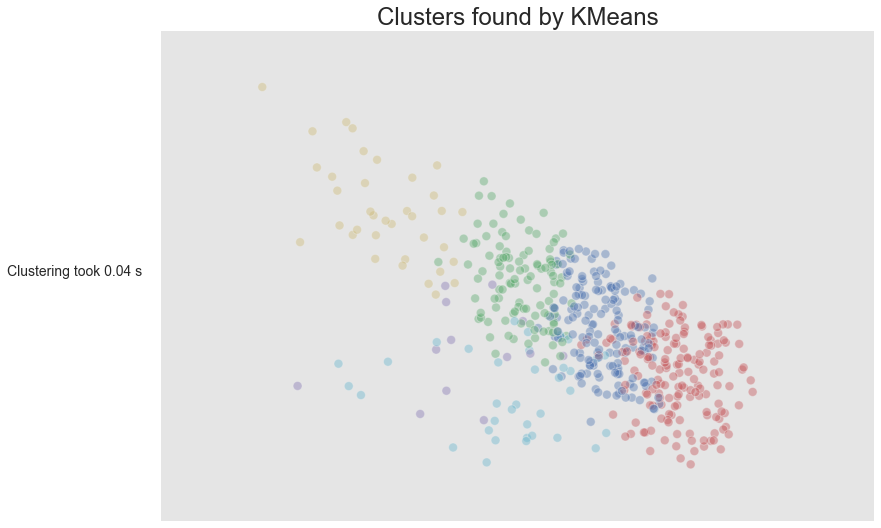

In [356]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})
cls_achievment = KMeans(n_clusters=6, init='k-means++',random_state=1)
cls_achievment.fit(X1)
print(cls_achievment.inertia_)

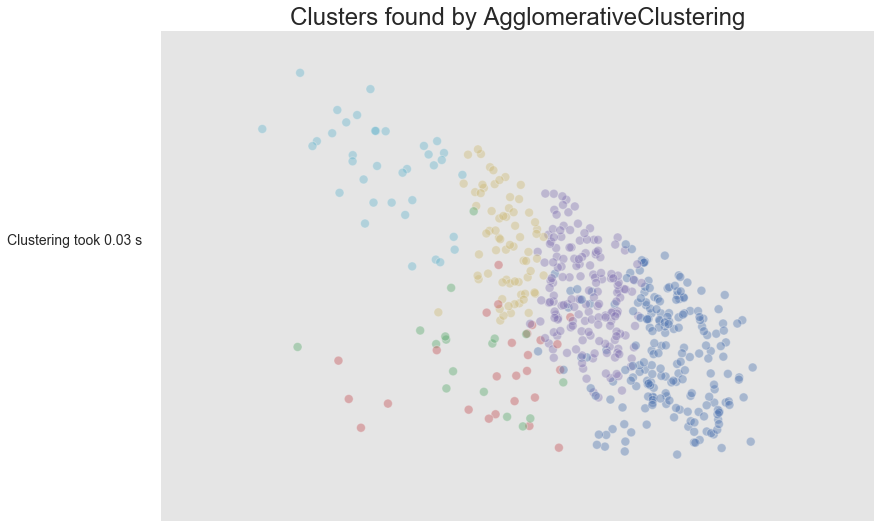

In [357]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})

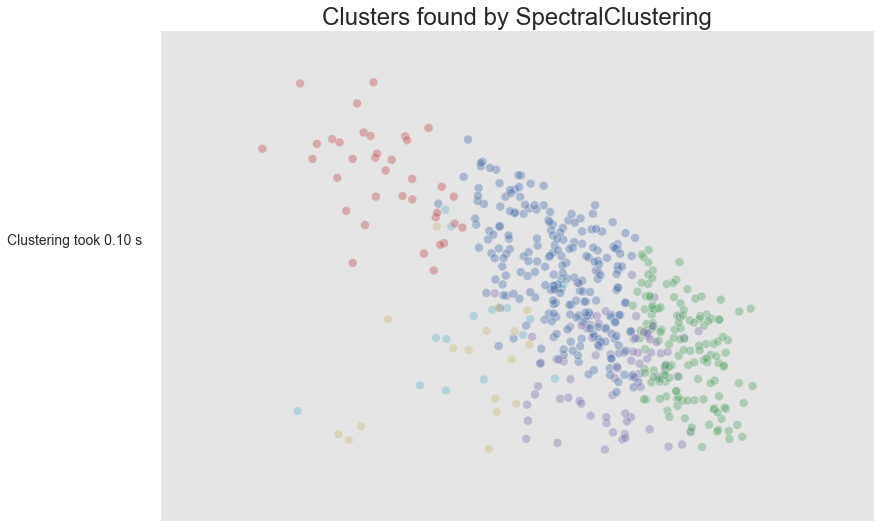

In [378]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6})


Spectral clustering form of graph clustering based on adjacency matrix of a graph. This is very useful when the structure of the individual clusters is highly non-convex . The key for spectral clustering is the transformation of the space. we don't have a purely globular cluster assumption; we do still have partitioning where it can be affected by noise.
The weakness of this clustering is there are no way of knowing the correct number of clusters, it is twice as slow algorithm ( 0.11 s to cluster the school achievement data) compared to k (0.04)  means and Agglomerative(0.03). And the clusters as expected, are not as well separated as in the case of k means which indicates that this clustering doesnt perform well on dense or globular data well 


### Comparing Spectral Clustering performance with others

In [373]:
from sklearn.cluster import SpectralClustering
schoolAttributes = ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District',
                    'educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','averageSalaryTeachers_District',
                    'advancedDegreeTeachers_District','studentsInSpecialEd_District','studentsInELL_District',
                    'specialEdTeachersFTE_District','counselorsFTE_District',
                    'otherProfessionalStaffFTE_District','administratorsFTE_District','yearsExperienceTeachers_District',
                    'freeReducedLunch_District','averagePropertyValuePerADM_District','population_District',
                    'averageHouseholdIncome_District','unemploymentRate_District','povertyRate_District',
                    'singleParentFamilies_District','low_StudentTeacherRatio']

achievment =       ['educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','freeReducedLunch_District']

race =             ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District']


District_school = districtData2014[schoolAttributes]

X1 = District_school[achievment]
X2 = District_school[race]
y = District_school['low_StudentTeacherRatio'].values
# del District_school[school] 
achievment.extend(race)
achievment.append('low_StudentTeacherRatio')
District_school = District_school.drop(achievment, axis=1)
X = District_school.values

params = []
for n_achievement in range(2,8):
    for n_race in range(2,8):
        # get the first clustering 
        cls_achievement = SpectralClustering(n_clusters=n_achievement,random_state=1)
        cls_achievement.fit(X1)
        newfeature_achievement = cls_achievement.labels_# the labels from kmeans clustering

        # append on the second clustering
        cls_race = SpectralClustering(n_clusters=n_race,random_state=1)    
        cls_race.fit(X2)
        newfeature_race = cls_race.labels_

        X3 = np.column_stack((X,pd.get_dummies(newfeature_achievement),pd.get_dummies(newfeature_race)))

        acc = cross_val_score(clf,X3,y=y,cv=cv_object)
        params.append((n_achievement,n_race,acc.mean()*100,acc.std()*100)) # save state

        print ("Clusters",n_achievement,n_race,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

('Clusters', 2, 2, 'Average accuracy = ', 75.816685164631892, '+-', 5.9780005979491815)
('Clusters', 2, 3, 'Average accuracy = ', 75.620606733259336, '+-', 5.7227912100333169)
('Clusters', 2, 4, 'Average accuracy = ', 75.04354136429609, '+-', 6.4786939250656639)
('Clusters', 2, 5, 'Average accuracy = ', 75.431927487976324, '+-', 5.7604015069212284)
('Clusters', 2, 6, 'Average accuracy = ', 75.823799766641059, '+-', 5.7509814131764108)
('Clusters', 2, 7, 'Average accuracy = ', 76.793306582429793, '+-', 4.571160151762542)
('Clusters', 3, 2, 'Average accuracy = ', 77.177637382964789, '+-', 5.5830343847749617)
('Clusters', 3, 3, 'Average accuracy = ', 76.197387518142236, '+-', 5.9171478356274845)
('Clusters', 3, 4, 'Average accuracy = ', 75.272987279091609, '+-', 6.7433074292619892)
('Clusters', 3, 5, 'Average accuracy = ', 76.034818862232854, '+-', 5.3948512264508617)
('Clusters', 3, 6, 'Average accuracy = ', 75.842226585844784, '+-', 5.4361639461725506)
('Clusters', 3, 7, 'Average accura

Spectral clusterring performed nearly the same as k-means++ for the folds accuracy mean ( 76.2) but it has higher STD (4.9)